## WNTRAC Paper figures 6-12 generation code

### NB: Ensure you run the notebook `npi_index.ipynb` before running the current notebook to generate the required data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os
import requests, io
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Fetch all the required data and load it in to pandas dataframes.
1. wntrac_events_df => WNTRAC NPIs events data. Update this with the latest data from https://github.com/IBM/wntrac/blob/master/data/README.md
2. wntrac_npi_index => WNTRAC NPI Index data. Generated from the notebook `npi_index.ipynb`
3. who_case_df => WHO COVID-19 cases data for world countries that can be downloaded from https://covid19.who.int/WHO-COVID-19-global-data.csv
4. us_cases => CDC COVID-19 cases data for US States that can be downloaded from https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD
5. territories_dict => A dictinary of countries including their ISO2, ISO3 codes and population

In [2]:
try:
    wntrac_events_df = pd.read_csv('ibm_wntrac_events.csv')
    wntrac_npi_index = pd.read_csv('wntrac_npi_index.csv')
    who_case_df = pd.read_csv('global_who.csv')
    us_cases = pd.read_csv('us_states_outcome.csv') 
except FileNotFoundError:
    print("Kindly first run the notebook 'npi_index.ipynb' before running the current notebook to generate the required data")
 
territories_dict = [{"admin0_iso_name":"Afghanistan","admin0_iso2":"AF","admin0_iso3":"AFG","Population":38928341},{"admin0_iso_name":"Albania","admin0_iso2":"AL","admin0_iso3":"ALB","Population":2877800},{"admin0_iso_name":"Algeria","admin0_iso2":"DZ","admin0_iso3":"DZA","Population":43851043},{"admin0_iso_name":"Andorra","admin0_iso2":"AD","admin0_iso3":"AND","Population":77265},{"admin0_iso_name":"Angola","admin0_iso2":"AO","admin0_iso3":"AGO","Population":32866268},{"admin0_iso_name":"Antigua and Barbuda","admin0_iso2":"AG","admin0_iso3":"ATG","Population":97928},{"admin0_iso_name":"Argentina","admin0_iso2":"AR","admin0_iso3":"ARG","Population":45195777},{"admin0_iso_name":"Armenia","admin0_iso2":"AM","admin0_iso3":"ARM","Population":2963234},{"admin0_iso_name":"Austria","admin0_iso2":"AT","admin0_iso3":"AUT","Population":9006400},{"admin0_iso_name":"Azerbaijan","admin0_iso2":"AZ","admin0_iso3":"AZE","Population":10139175},{"admin0_iso_name":"Bahamas","admin0_iso2":"BS","admin0_iso3":"BHS","Population":393248},{"admin0_iso_name":"Bahrain","admin0_iso2":"BH","admin0_iso3":"BHR","Population":1701583},{"admin0_iso_name":"Bangladesh","admin0_iso2":"BD","admin0_iso3":"BGD","Population":164689383},{"admin0_iso_name":"Barbados","admin0_iso2":"BB","admin0_iso3":"BRB","Population":287371},{"admin0_iso_name":"Belarus","admin0_iso2":"BY","admin0_iso3":"BLR","Population":9449321},{"admin0_iso_name":"Belgium","admin0_iso2":"BE","admin0_iso3":"BEL","Population":11589616},{"admin0_iso_name":"Belize","admin0_iso2":"BZ","admin0_iso3":"BLZ","Population":397621},{"admin0_iso_name":"Benin","admin0_iso2":"BJ","admin0_iso3":"BEN","Population":12123198},{"admin0_iso_name":"Bhutan","admin0_iso2":"BT","admin0_iso3":"BTN","Population":771612},{"admin0_iso_name":"Bolivia","admin0_iso2":"BO","admin0_iso3":"BOL","Population":11673029},{"admin0_iso_name":"Bosnia and Herzegovina","admin0_iso2":"BA","admin0_iso3":"BIH","Population":3280815},{"admin0_iso_name":"Botswana","admin0_iso2":"BW","admin0_iso3":"BWA","Population":2351625},{"admin0_iso_name":"Brazil","admin0_iso2":"BR","admin0_iso3":"BRA","Population":212559409},{"admin0_iso_name":"Brunei","admin0_iso2":"BN","admin0_iso3":"BRN","Population":437483},{"admin0_iso_name":"Bulgaria","admin0_iso2":"BG","admin0_iso3":"BGR","Population":6948445},{"admin0_iso_name":"Burkina Faso","admin0_iso2":"BF","admin0_iso3":"BFA","Population":20903278},{"admin0_iso_name":"Burma","admin0_iso2":"MM","admin0_iso3":"MMR","Population":54409794},{"admin0_iso_name":"Burundi","admin0_iso2":"BI","admin0_iso3":"BDI","Population":11890781},{"admin0_iso_name":"Cabo Verde","admin0_iso2":"CV","admin0_iso3":"CPV","Population":555988},{"admin0_iso_name":"Cambodia","admin0_iso2":"KH","admin0_iso3":"KHM","Population":16718971},{"admin0_iso_name":"Cameroon","admin0_iso2":"CM","admin0_iso3":"CMR","Population":26545864},{"admin0_iso_name":"Central African Republic","admin0_iso2":"CF","admin0_iso3":"CAF","Population":4829764},{"admin0_iso_name":"Chad","admin0_iso2":"TD","admin0_iso3":"TCD","Population":16425859},{"admin0_iso_name":"Chile","admin0_iso2":"CL","admin0_iso3":"CHL","Population":19116209},{"admin0_iso_name":"Colombia","admin0_iso2":"CO","admin0_iso3":"COL","Population":50882884},{"admin0_iso_name":"Congo (Brazzaville)","admin0_iso2":"CG","admin0_iso3":"COG","Population":5518092},{"admin0_iso_name":"Congo (Kinshasa)","admin0_iso2":"CD","admin0_iso3":"COD","Population":89561404},{"admin0_iso_name":"Comoros","admin0_iso2":"KM","admin0_iso3":"COM","Population":869595},{"admin0_iso_name":"Costa Rica","admin0_iso2":"CR","admin0_iso3":"CRI","Population":5094114},{"admin0_iso_name":"Cote d'Ivoire","admin0_iso2":"CI","admin0_iso3":"CIV","Population":26378275},{"admin0_iso_name":"Croatia","admin0_iso2":"HR","admin0_iso3":"HRV","Population":4105268},{"admin0_iso_name":"Cuba","admin0_iso2":"CU","admin0_iso3":"CUB","Population":11326616},{"admin0_iso_name":"Cyprus","admin0_iso2":"CY","admin0_iso3":"CYP","Population":1207361},{"admin0_iso_name":"Czechia","admin0_iso2":"CZ","admin0_iso3":"CZE","Population":10708982},{"admin0_iso_name":"Denmark","admin0_iso2":"DK","admin0_iso3":"DNK","Population":5792203},{"admin0_iso_name":"Faroe Islands, Denmark","admin0_iso2":"FO","admin0_iso3":"FRO","Population":48865},{"admin0_iso_name":"Greenland, Denmark","admin0_iso2":"GL","admin0_iso3":"GRL","Population":56772},{"admin0_iso_name":"Diamond Princess","admin0_iso2":"","admin0_iso3":"","Population":""},{"admin0_iso_name":"Djibouti","admin0_iso2":"DJ","admin0_iso3":"DJI","Population":988002},{"admin0_iso_name":"Dominica","admin0_iso2":"DM","admin0_iso3":"DMA","Population":71991},{"admin0_iso_name":"Dominican Republic","admin0_iso2":"DO","admin0_iso3":"DOM","Population":10847904},{"admin0_iso_name":"Ecuador","admin0_iso2":"EC","admin0_iso3":"ECU","Population":17643060},{"admin0_iso_name":"Egypt","admin0_iso2":"EG","admin0_iso3":"EGY","Population":102334403},{"admin0_iso_name":"El Salvador","admin0_iso2":"SV","admin0_iso3":"SLV","Population":6486201},{"admin0_iso_name":"Equatorial Guinea","admin0_iso2":"GQ","admin0_iso3":"GNQ","Population":1402985},{"admin0_iso_name":"Eritrea","admin0_iso2":"ER","admin0_iso3":"ERI","Population":3546427},{"admin0_iso_name":"Estonia","admin0_iso2":"EE","admin0_iso3":"EST","Population":1326539},{"admin0_iso_name":"Eswatini","admin0_iso2":"SZ","admin0_iso3":"SWZ","Population":1160164},{"admin0_iso_name":"Ethiopia","admin0_iso2":"ET","admin0_iso3":"ETH","Population":114963583},{"admin0_iso_name":"Fiji","admin0_iso2":"FJ","admin0_iso3":"FJI","Population":896444},{"admin0_iso_name":"Finland","admin0_iso2":"FI","admin0_iso3":"FIN","Population":5540718},{"admin0_iso_name":"France","admin0_iso2":"FR","admin0_iso3":"FRA","Population":65273512},{"admin0_iso_name":"French Guiana, France","admin0_iso2":"GF","admin0_iso3":"GUF","Population":298682},{"admin0_iso_name":"French Polynesia, France","admin0_iso2":"PF","admin0_iso3":"PYF","Population":280904},{"admin0_iso_name":"Guadeloupe, France","admin0_iso2":"GP","admin0_iso3":"GLP","Population":400127},{"admin0_iso_name":"Martinique, France","admin0_iso2":"MQ","admin0_iso3":"MTQ","Population":375265},{"admin0_iso_name":"Mayotte, France","admin0_iso2":"YT","admin0_iso3":"MYT","Population":272813},{"admin0_iso_name":"New Caledonia, France","admin0_iso2":"NC","admin0_iso3":"NCL","Population":285491},{"admin0_iso_name":"Reunion, France","admin0_iso2":"RE","admin0_iso3":"REU","Population":895308},{"admin0_iso_name":"Saint Barthelemy, France","admin0_iso2":"BL","admin0_iso3":"BLM","Population":9885},{"admin0_iso_name":"Saint Pierre and Miquelon, France","admin0_iso2":"PM","admin0_iso3":"SPM","Population":5795},{"admin0_iso_name":"St Martin, France","admin0_iso2":"MF","admin0_iso3":"MAF","Population":38659},{"admin0_iso_name":"Wallis and Futuna, France","admin0_iso2":"WF","admin0_iso3":"WLF","Population":15289},{"admin0_iso_name":"Gabon","admin0_iso2":"GA","admin0_iso3":"GAB","Population":2225728},{"admin0_iso_name":"Gambia","admin0_iso2":"GM","admin0_iso3":"GMB","Population":2416664},{"admin0_iso_name":"Georgia","admin0_iso2":"GE","admin0_iso3":"GEO","Population":3989175},{"admin0_iso_name":"Germany","admin0_iso2":"DE","admin0_iso3":"DEU","Population":83783945},{"admin0_iso_name":"Ghana","admin0_iso2":"GH","admin0_iso3":"GHA","Population":31072945},{"admin0_iso_name":"Greece","admin0_iso2":"GR","admin0_iso3":"GRC","Population":10423056},{"admin0_iso_name":"Grenada","admin0_iso2":"GD","admin0_iso3":"GRD","Population":112519},{"admin0_iso_name":"Guatemala","admin0_iso2":"GT","admin0_iso3":"GTM","Population":17915567},{"admin0_iso_name":"Guinea","admin0_iso2":"GN","admin0_iso3":"GIN","Population":13132792},{"admin0_iso_name":"Guinea-Bissau","admin0_iso2":"GW","admin0_iso3":"GNB","Population":1967998},{"admin0_iso_name":"Guyana","admin0_iso2":"GY","admin0_iso3":"GUY","Population":786559},{"admin0_iso_name":"Haiti","admin0_iso2":"HT","admin0_iso3":"HTI","Population":11402533},{"admin0_iso_name":"Holy See","admin0_iso2":"VA","admin0_iso3":"VAT","Population":809},{"admin0_iso_name":"Honduras","admin0_iso2":"HN","admin0_iso3":"HND","Population":9904608},{"admin0_iso_name":"Hungary","admin0_iso2":"HU","admin0_iso3":"HUN","Population":9660350},{"admin0_iso_name":"Iceland","admin0_iso2":"IS","admin0_iso3":"ISL","Population":341250},{"admin0_iso_name":"India","admin0_iso2":"IN","admin0_iso3":"IND","Population":1380004385},{"admin0_iso_name":"Indonesia","admin0_iso2":"ID","admin0_iso3":"IDN","Population":273523621},{"admin0_iso_name":"Iran","admin0_iso2":"IR","admin0_iso3":"IRN","Population":83992953},{"admin0_iso_name":"Iraq","admin0_iso2":"IQ","admin0_iso3":"IRQ","Population":40222503},{"admin0_iso_name":"Ireland","admin0_iso2":"IE","admin0_iso3":"IRL","Population":4937796},{"admin0_iso_name":"Israel","admin0_iso2":"IL","admin0_iso3":"ISR","Population":8655541},{"admin0_iso_name":"Italy","admin0_iso2":"IT","admin0_iso3":"ITA","Population":60461828},{"admin0_iso_name":"Jamaica","admin0_iso2":"JM","admin0_iso3":"JAM","Population":2961161},{"admin0_iso_name":"Japan","admin0_iso2":"JP","admin0_iso3":"JPN","Population":126476458},{"admin0_iso_name":"Jordan","admin0_iso2":"JO","admin0_iso3":"JOR","Population":10203140},{"admin0_iso_name":"Kazakhstan","admin0_iso2":"KZ","admin0_iso3":"KAZ","Population":18776707},{"admin0_iso_name":"Kenya","admin0_iso2":"KE","admin0_iso3":"KEN","Population":53771300},{"admin0_iso_name":"Korea, South","admin0_iso2":"KR","admin0_iso3":"KOR","Population":51269183},{"admin0_iso_name":"Kosovo","admin0_iso2":"XK","admin0_iso3":"XKS","Population":1810366},{"admin0_iso_name":"Kuwait","admin0_iso2":"KW","admin0_iso3":"KWT","Population":4270563},{"admin0_iso_name":"Kyrgyzstan","admin0_iso2":"KG","admin0_iso3":"KGZ","Population":6524191},{"admin0_iso_name":"Laos","admin0_iso2":"LA","admin0_iso3":"LAO","Population":7275556},{"admin0_iso_name":"Latvia","admin0_iso2":"LV","admin0_iso3":"LVA","Population":1886202},{"admin0_iso_name":"Lebanon","admin0_iso2":"LB","admin0_iso3":"LBN","Population":6825442},{"admin0_iso_name":"Lesotho","admin0_iso2":"LS","admin0_iso3":"LSO","Population":2142252},{"admin0_iso_name":"Liberia","admin0_iso2":"LR","admin0_iso3":"LBR","Population":5057677},{"admin0_iso_name":"Libya","admin0_iso2":"LY","admin0_iso3":"LBY","Population":6871287},{"admin0_iso_name":"Liechtenstein","admin0_iso2":"LI","admin0_iso3":"LIE","Population":38137},{"admin0_iso_name":"Lithuania","admin0_iso2":"LT","admin0_iso3":"LTU","Population":2722291},{"admin0_iso_name":"Luxembourg","admin0_iso2":"LU","admin0_iso3":"LUX","Population":625976},{"admin0_iso_name":"Madagascar","admin0_iso2":"MG","admin0_iso3":"MDG","Population":27691019},{"admin0_iso_name":"Malawi","admin0_iso2":"MW","admin0_iso3":"MWI","Population":19129955},{"admin0_iso_name":"Malaysia","admin0_iso2":"MY","admin0_iso3":"MYS","Population":32365998},{"admin0_iso_name":"Maldives","admin0_iso2":"MV","admin0_iso3":"MDV","Population":540542},{"admin0_iso_name":"Mali","admin0_iso2":"ML","admin0_iso3":"MLI","Population":20250834},{"admin0_iso_name":"Malta","admin0_iso2":"MT","admin0_iso3":"MLT","Population":441539},{"admin0_iso_name":"Marshall Islands","admin0_iso2":"MH","admin0_iso3":"MHL","Population":58413},{"admin0_iso_name":"Mauritania","admin0_iso2":"MR","admin0_iso3":"MRT","Population":4649660},{"admin0_iso_name":"Mauritius","admin0_iso2":"MU","admin0_iso3":"MUS","Population":1271767},{"admin0_iso_name":"Mexico","admin0_iso2":"MX","admin0_iso3":"MEX","Population":127792286},{"admin0_iso_name":"Moldova","admin0_iso2":"MD","admin0_iso3":"MDA","Population":4033963},{"admin0_iso_name":"Monaco","admin0_iso2":"MC","admin0_iso3":"MCO","Population":39244},{"admin0_iso_name":"Mongolia","admin0_iso2":"MN","admin0_iso3":"MNG","Population":3278292},{"admin0_iso_name":"Montenegro","admin0_iso2":"ME","admin0_iso3":"MNE","Population":628062},{"admin0_iso_name":"Morocco","admin0_iso2":"MA","admin0_iso3":"MAR","Population":36910558},{"admin0_iso_name":"Mozambique","admin0_iso2":"MZ","admin0_iso3":"MOZ","Population":31255435},{"admin0_iso_name":"MS Zaandam","admin0_iso2":"","admin0_iso3":"","Population":""},{"admin0_iso_name":"Namibia","admin0_iso2":"","admin0_iso3":"NAM","Population":2540916},{"admin0_iso_name":"Nepal","admin0_iso2":"NP","admin0_iso3":"NPL","Population":29136808},{"admin0_iso_name":"Netherlands","admin0_iso2":"NL","admin0_iso3":"NLD","Population":17134873},{"admin0_iso_name":"Aruba, Netherlands","admin0_iso2":"AW","admin0_iso3":"ABW","Population":106766},{"admin0_iso_name":"Curacao, Netherlands","admin0_iso2":"CW","admin0_iso3":"CUW","Population":164100},{"admin0_iso_name":"Sint Maarten, Netherlands","admin0_iso2":"SX","admin0_iso3":"SXM","Population":42882},{"admin0_iso_name":"Bonaire, Sint Eustatius and Saba, Netherlands","admin0_iso2":"BQ","admin0_iso3":"BES","Population":26221},{"admin0_iso_name":"New Zealand","admin0_iso2":"NZ","admin0_iso3":"NZL","Population":4822233},{"admin0_iso_name":"Nicaragua","admin0_iso2":"NI","admin0_iso3":"NIC","Population":6624554},{"admin0_iso_name":"Niger","admin0_iso2":"NE","admin0_iso3":"NER","Population":24206636},{"admin0_iso_name":"Nigeria","admin0_iso2":"NG","admin0_iso3":"NGA","Population":206139587},{"admin0_iso_name":"North Macedonia","admin0_iso2":"MK","admin0_iso3":"MKD","Population":2083380},{"admin0_iso_name":"Norway","admin0_iso2":"NO","admin0_iso3":"NOR","Population":5421242},{"admin0_iso_name":"Oman","admin0_iso2":"OM","admin0_iso3":"OMN","Population":5106622},{"admin0_iso_name":"Pakistan","admin0_iso2":"PK","admin0_iso3":"PAK","Population":220892331},{"admin0_iso_name":"Panama","admin0_iso2":"PA","admin0_iso3":"PAN","Population":4314768},{"admin0_iso_name":"Papua New Guinea","admin0_iso2":"PG","admin0_iso3":"PNG","Population":8947027},{"admin0_iso_name":"Paraguay","admin0_iso2":"PY","admin0_iso3":"PRY","Population":7132530},{"admin0_iso_name":"Peru","admin0_iso2":"PE","admin0_iso3":"PER","Population":32971846},{"admin0_iso_name":"Philippines","admin0_iso2":"PH","admin0_iso3":"PHL","Population":109581085},{"admin0_iso_name":"Poland","admin0_iso2":"PL","admin0_iso3":"POL","Population":37846605},{"admin0_iso_name":"Portugal","admin0_iso2":"PT","admin0_iso3":"PRT","Population":10196707},{"admin0_iso_name":"Qatar","admin0_iso2":"QA","admin0_iso3":"QAT","Population":2881060},{"admin0_iso_name":"Romania","admin0_iso2":"RO","admin0_iso3":"ROU","Population":19237682},{"admin0_iso_name":"Russia","admin0_iso2":"RU","admin0_iso3":"RUS","Population":145934460},{"admin0_iso_name":"Rwanda","admin0_iso2":"RW","admin0_iso3":"RWA","Population":12952209},{"admin0_iso_name":"Saint Kitts and Nevis","admin0_iso2":"KN","admin0_iso3":"KNA","Population":53192},{"admin0_iso_name":"Saint Lucia","admin0_iso2":"LC","admin0_iso3":"LCA","Population":183629},{"admin0_iso_name":"Saint Vincent and the Grenadines","admin0_iso2":"VC","admin0_iso3":"VCT","Population":110947},{"admin0_iso_name":"San Marino","admin0_iso2":"SM","admin0_iso3":"SMR","Population":33938},{"admin0_iso_name":"Sao Tome and Principe","admin0_iso2":"ST","admin0_iso3":"STP","Population":219161},{"admin0_iso_name":"Saudi Arabia","admin0_iso2":"SA","admin0_iso3":"SAU","Population":34813867},{"admin0_iso_name":"Senegal","admin0_iso2":"SN","admin0_iso3":"SEN","Population":16743930},{"admin0_iso_name":"Serbia","admin0_iso2":"RS","admin0_iso3":"SRB","Population":8737370},{"admin0_iso_name":"Seychelles","admin0_iso2":"SC","admin0_iso3":"SYC","Population":98340},{"admin0_iso_name":"Sierra Leone","admin0_iso2":"SL","admin0_iso3":"SLE","Population":7976985},{"admin0_iso_name":"Singapore","admin0_iso2":"SG","admin0_iso3":"SGP","Population":5850343},{"admin0_iso_name":"Slovakia","admin0_iso2":"SK","admin0_iso3":"SVK","Population":5459643},{"admin0_iso_name":"Slovenia","admin0_iso2":"SI","admin0_iso3":"SVN","Population":2078932},{"admin0_iso_name":"Solomon Islands","admin0_iso2":"SB","admin0_iso3":"SLB","Population":652858},{"admin0_iso_name":"Somalia","admin0_iso2":"SO","admin0_iso3":"SOM","Population":15893219},{"admin0_iso_name":"South Africa","admin0_iso2":"ZA","admin0_iso3":"ZAF","Population":59308690},{"admin0_iso_name":"South Sudan","admin0_iso2":"SS","admin0_iso3":"SSD","Population":11193729},{"admin0_iso_name":"Spain","admin0_iso2":"ES","admin0_iso3":"ESP","Population":46754783},{"admin0_iso_name":"Sri Lanka","admin0_iso2":"LK","admin0_iso3":"LKA","Population":21413250},{"admin0_iso_name":"Sudan","admin0_iso2":"SD","admin0_iso3":"SDN","Population":43849269},{"admin0_iso_name":"Suriname","admin0_iso2":"SR","admin0_iso3":"SUR","Population":586634},{"admin0_iso_name":"Sweden","admin0_iso2":"SE","admin0_iso3":"SWE","Population":10099270},{"admin0_iso_name":"Switzerland","admin0_iso2":"CH","admin0_iso3":"CHE","Population":8654618},{"admin0_iso_name":"Syria","admin0_iso2":"SY","admin0_iso3":"SYR","Population":17500657},{"admin0_iso_name":"Taiwan*","admin0_iso2":"TW","admin0_iso3":"TWN","Population":23816775},{"admin0_iso_name":"Tajikistan","admin0_iso2":"TJ","admin0_iso3":"TJK","Population":9537642},{"admin0_iso_name":"Tanzania","admin0_iso2":"TZ","admin0_iso3":"TZA","Population":59734213},{"admin0_iso_name":"Thailand","admin0_iso2":"TH","admin0_iso3":"THA","Population":69799978},{"admin0_iso_name":"Timor-Leste","admin0_iso2":"TL","admin0_iso3":"TLS","Population":1318442},{"admin0_iso_name":"Togo","admin0_iso2":"TG","admin0_iso3":"TGO","Population":8278737},{"admin0_iso_name":"Trinidad and Tobago","admin0_iso2":"TT","admin0_iso3":"TTO","Population":1399491},{"admin0_iso_name":"Tunisia","admin0_iso2":"TN","admin0_iso3":"TUN","Population":11818618},{"admin0_iso_name":"Turkey","admin0_iso2":"TR","admin0_iso3":"TUR","Population":84339067},{"admin0_iso_name":"Uganda","admin0_iso2":"UG","admin0_iso3":"UGA","Population":45741000},{"admin0_iso_name":"Ukraine","admin0_iso2":"UA","admin0_iso3":"UKR","Population":43733759},{"admin0_iso_name":"United Arab Emirates","admin0_iso2":"AE","admin0_iso3":"ARE","Population":9890400},{"admin0_iso_name":"United Kingdom","admin0_iso2":"GB","admin0_iso3":"GBR","Population":67886004},{"admin0_iso_name":"Bermuda, United Kingdom","admin0_iso2":"BM","admin0_iso3":"BMU","Population":62273},{"admin0_iso_name":"British Virgin Islands, United Kingdom","admin0_iso2":"VG","admin0_iso3":"VGB","Population":30237},{"admin0_iso_name":"Cayman Islands, United Kingdom","admin0_iso2":"KY","admin0_iso3":"CYM","Population":65720},{"admin0_iso_name":"Falkland Islands (Malvinas), United Kingdom","admin0_iso2":"FK","admin0_iso3":"FLK","Population":3483},{"admin0_iso_name":"Gibraltar, United Kingdom","admin0_iso2":"GI","admin0_iso3":"GIB","Population":33691},{"admin0_iso_name":"Isle of Man, United Kingdom","admin0_iso2":"IM","admin0_iso3":"IMN","Population":85032},{"admin0_iso_name":"Montserrat, United Kingdom","admin0_iso2":"MS","admin0_iso3":"MSR","Population":4999},{"admin0_iso_name":"Turks and Caicos Islands, United Kingdom","admin0_iso2":"TC","admin0_iso3":"TCA","Population":38718},{"admin0_iso_name":"Anguilla, United Kingdom","admin0_iso2":"AI","admin0_iso3":"AIA","Population":15002},{"admin0_iso_name":"Uruguay","admin0_iso2":"UY","admin0_iso3":"URY","Population":3473727},{"admin0_iso_name":"Uzbekistan","admin0_iso2":"UZ","admin0_iso3":"UZB","Population":33469199},{"admin0_iso_name":"Vanuatu","admin0_iso2":"VU","admin0_iso3":"VUT","Population":292680},{"admin0_iso_name":"Venezuela","admin0_iso2":"VE","admin0_iso3":"VEN","Population":28435943},{"admin0_iso_name":"Vietnam","admin0_iso2":"VN","admin0_iso3":"VNM","Population":97338583},{"admin0_iso_name":"West Bank and Gaza","admin0_iso2":"PS","admin0_iso3":"PSE","Population":5101416},{"admin0_iso_name":"Western Sahara","admin0_iso2":"EH","admin0_iso3":"ESH","Population":597330},{"admin0_iso_name":"Yemen","admin0_iso2":"YE","admin0_iso3":"YEM","Population":29825968},{"admin0_iso_name":"Zambia","admin0_iso2":"ZM","admin0_iso3":"ZMB","Population":18383956},{"admin0_iso_name":"Zimbabwe","admin0_iso2":"ZW","admin0_iso3":"ZWE","Population":14862927},{"admin0_iso_name":"Australia","admin0_iso2":"AU","admin0_iso3":"AUS","Population":25459700},{"admin0_iso_name":"Canada","admin0_iso2":"CA","admin0_iso3":"CAN","Population":37855702},{"admin0_iso_name":"China","admin0_iso2":"CN","admin0_iso3":"CHN","Population":1404676330},{"admin0_iso_name":"Hong Kong, China","admin0_iso2":"HK","admin0_iso3":"HKG","Population":7496988},{"admin0_iso_name":"Macau, China","admin0_iso2":"MO","admin0_iso3":"MAC","Population":649342},{"admin0_iso_name":"US","admin0_iso2":"US","admin0_iso3":"USA","Population":329466283},{"admin0_iso_name":"American Samoa, US","admin0_iso2":"AS","admin0_iso3":"ASM","Population":55641},{"admin0_iso_name":"Guam, US","admin0_iso2":"GU","admin0_iso3":"GUM","Population":164229},{"admin0_iso_name":"Northern Mariana Islands, US","admin0_iso2":"MP","admin0_iso3":"MNP","Population":55144},{"admin0_iso_name":"Virgin Islands, US","admin0_iso2":"VI","admin0_iso3":"VIR","Population":107268},{"admin0_iso_name":"Puerto Rico, US","admin0_iso2":"PR","admin0_iso3":"PRI","Population":2933408}]
        
        

### Figure 6: NPIs distribution 

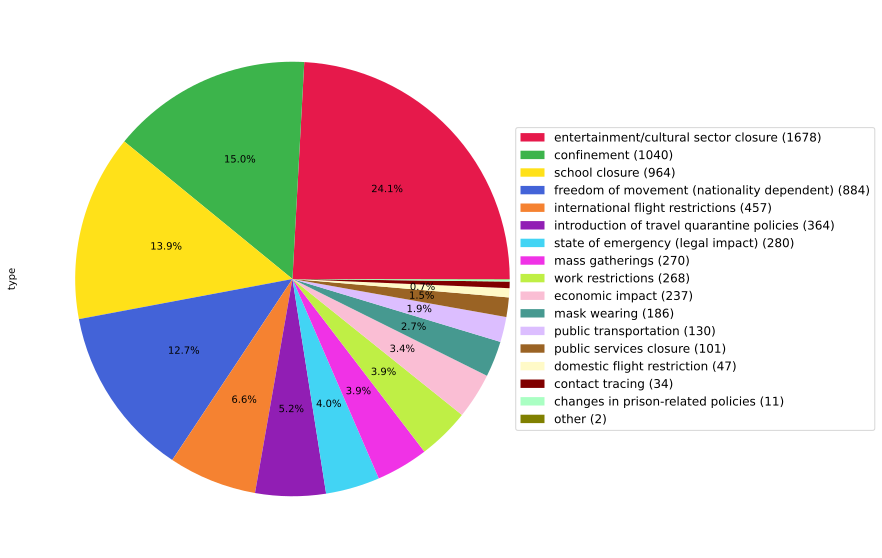

In [3]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9']
sns.set_palette(sns.color_palette(colors))
event_approved = wntrac_events_df.copy()
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0.6 else ''

my_labels = []
for val, cnt in event_approved['type'].value_counts().iteritems():
    my_labels.append(f'{val} ({cnt})')
    
orderOfTypes = []
for val, cnt in event_approved['type'].value_counts().iteritems():
    orderOfTypes.append(val)
    
colorDict = {orderOfTypes[i]: colors[i] for i in range(len(orderOfTypes))}

pie = event_approved.type.value_counts().plot(kind='pie', figsize=(10,10), autopct=my_autopct, labels =['']*len(orderOfTypes))

pie.legend(labels = my_labels, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=12)
pie.figure.savefig('stats-npi-distribution.jpeg', dpi=1200)

### Fig 7: region count by NPI global

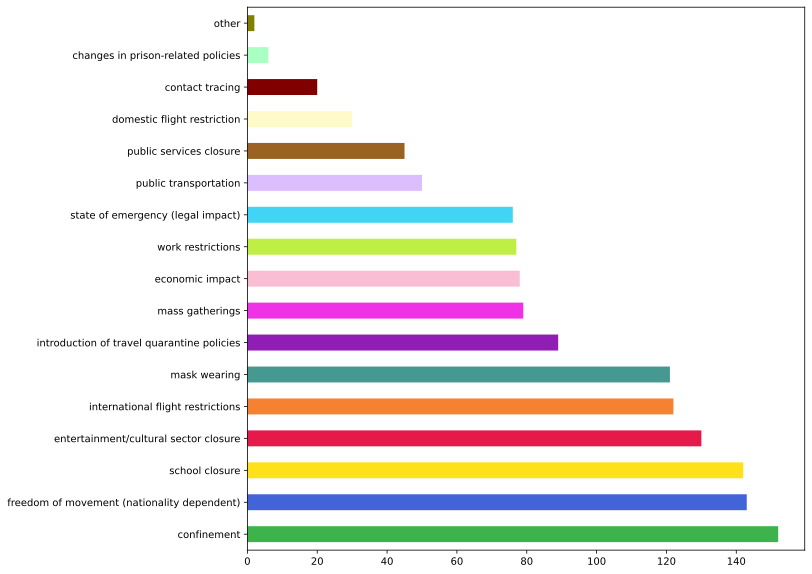

In [4]:
# rest_freq = event_approved[~event_approved['country'].str.startswith('USA-')]
rest_freq = event_approved[(event_approved['country']!='USA')]
rest_freqData = rest_freq[['country', 'type']]
rest_freqData = rest_freqData.drop_duplicates()
rest_freqData = rest_freqData.type.value_counts()
rest_freq_colors = []
for val, cnt in rest_freqData.iteritems():
    rest_freq_colors.append(colorDict[val])

rest_freq_plot = rest_freqData.plot(kind='barh', figsize=(10,10), color = rest_freq_colors)

rest_freq_plot.figure.savefig('stats-region-count-by-npi.jpeg', dpi=1200)

### Fig 7 region count by NPI USA

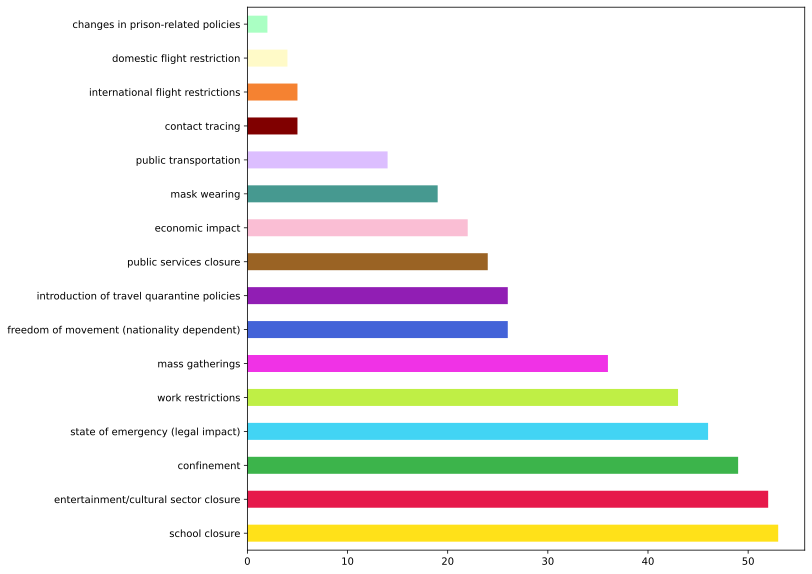

In [5]:
# usa_freq = event_approved[event_approved['country'].str.startswith('USA-')]
usa_freq = event_approved[(event_approved['country']=='USA')]
usa_freqData = usa_freq[['state/province', 'type']]
usa_freqData.head()
usa_freqData = usa_freqData.drop_duplicates()
usa_freqData = usa_freqData.type.value_counts()
usa_freq_colors = []
for val, cnt in usa_freqData.iteritems():
    usa_freq_colors.append(colorDict[val])

usa_freq_plot = usa_freqData.plot(kind='barh', figsize=(10,10), color = usa_freq_colors)

usa_freq_plot.figure.savefig('stats-region-count-by-npi-us.jpeg', dpi=1200)

### Figure 8 - global count by region

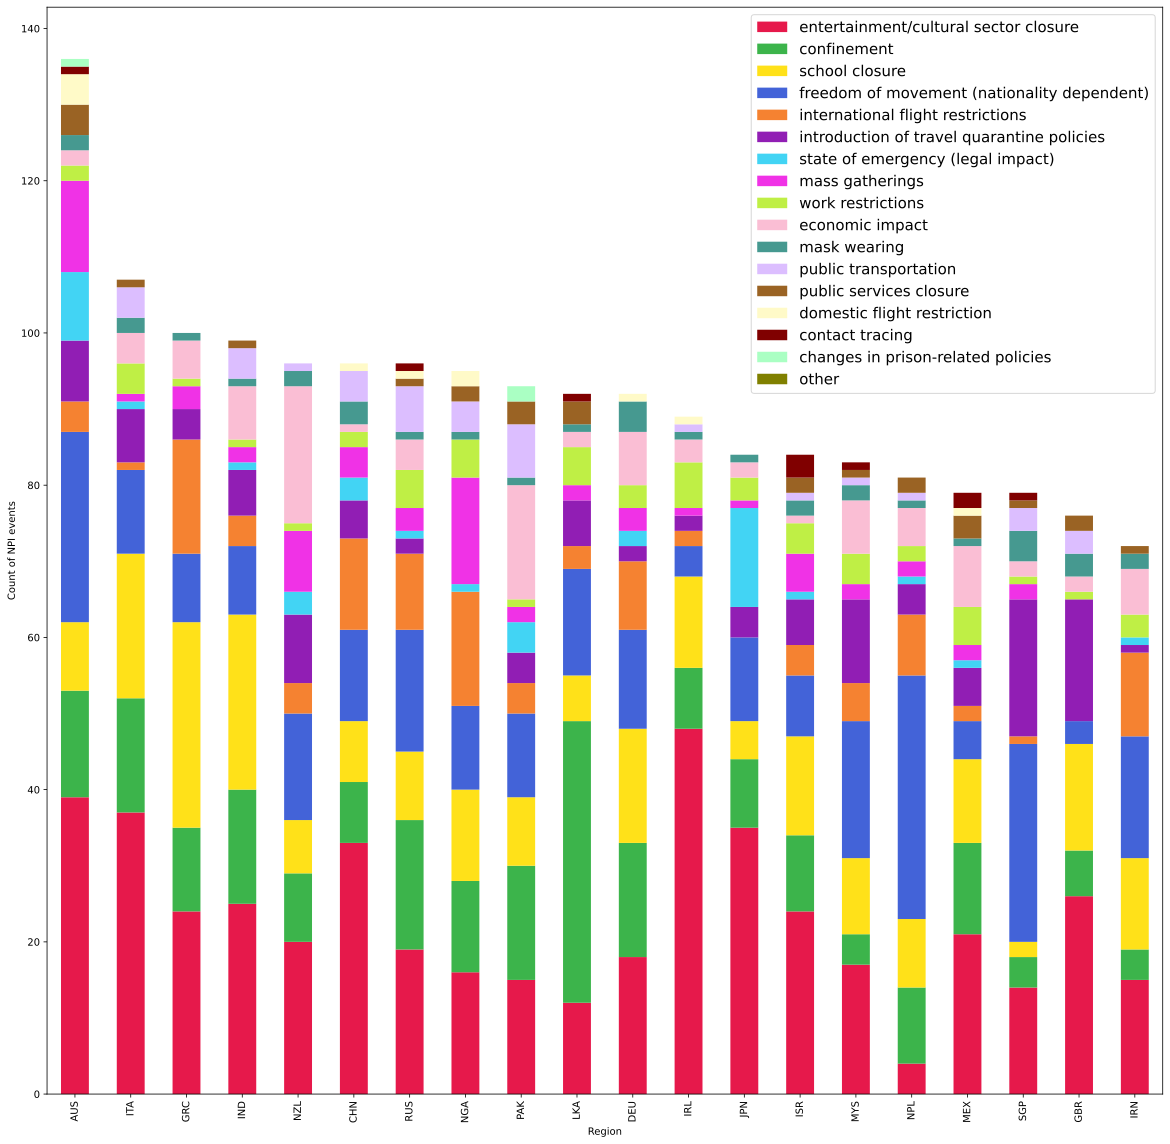

In [6]:
rest = event_approved[(event_approved['country']!='USA')]
rest_highest = rest.country.value_counts().head(20).index.tolist()
rest_data = event_approved[event_approved['country'].isin(rest_highest)]

rest_barData = rest_data[['country', 'type']]
rest_barData
rest_barData['count'] = 1

rest_pivot_table = pd.pivot_table(rest_barData, index='country', columns='type', values='count', aggfunc=np.sum, fill_value = 0)
rest_pivot_table = rest_pivot_table.reindex(orderOfTypes, axis = 1)
rest_pivot_table

rest_plot = rest_pivot_table.loc[rest_highest].plot.bar(stacked=True, figsize=(20,20))
rest_plot.legend(bbox_to_anchor=(1.0, 1.0), fontsize=15)
rest_plot.set_ylabel('Count of NPI events')
rest_plot.set_xlabel('Region')
rest_plot.figure.savefig('stats-npi-count-by-region.jpeg', dpi=1200)

### Figure 8 - USA count by region

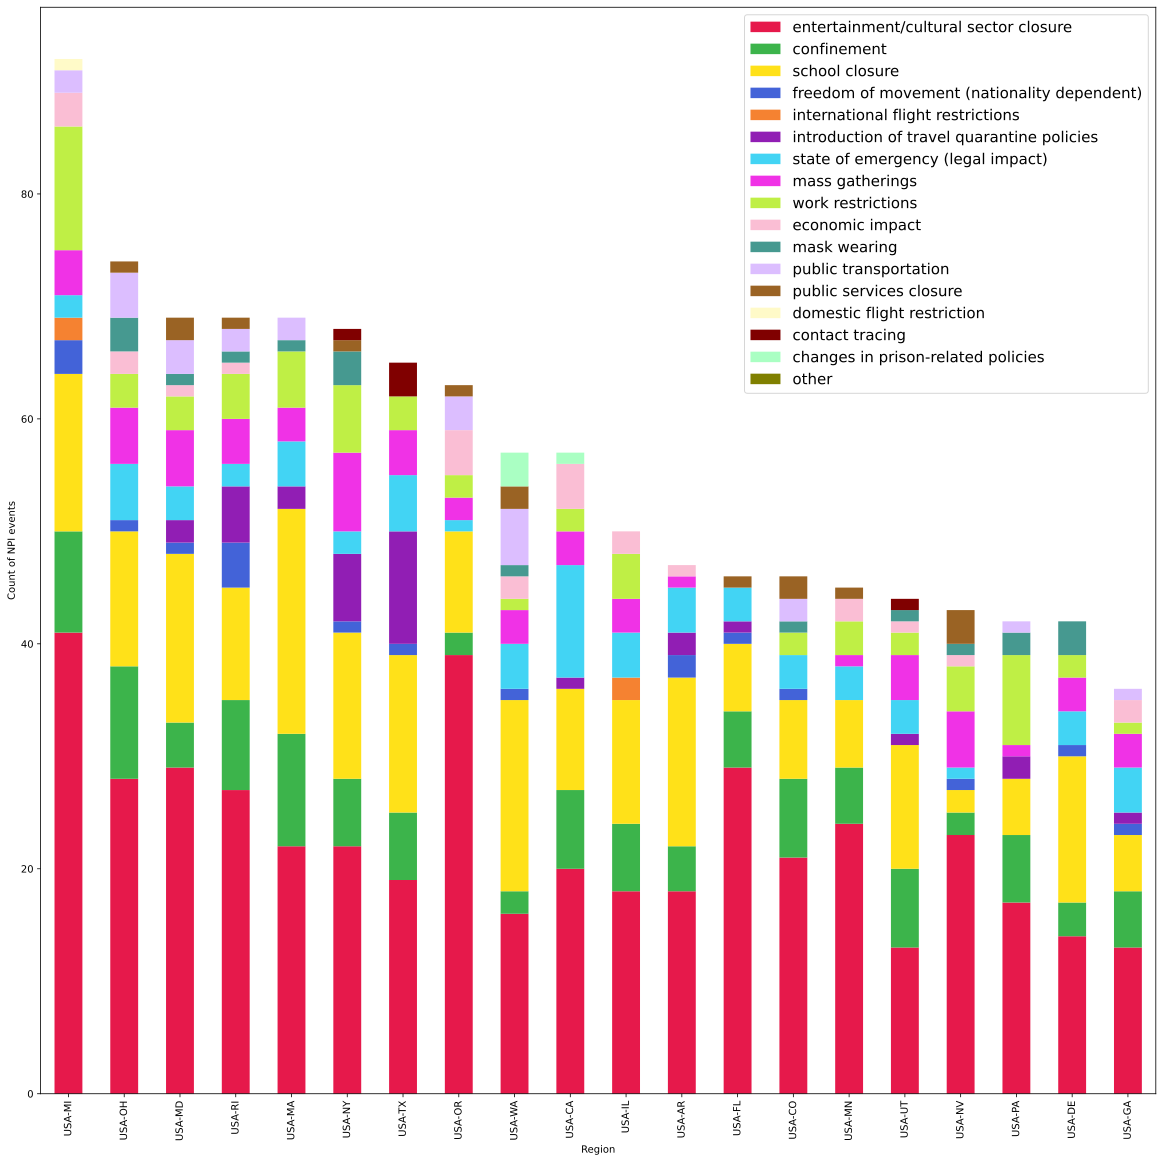

In [7]:
usa = event_approved[(event_approved['country']=='USA')]
usa_highest = usa['state/province'].value_counts().head(20).index.tolist()
usa_data = event_approved[event_approved['state/province'].isin(usa_highest)]

usa_barData = usa_data[['state/province', 'type']]
usa_barData.loc[:, 'count'] = 1
usa_barData
usa_pivot_table = pd.pivot_table(usa_barData, index='state/province', columns='type', values='count', aggfunc=np.sum, fill_value = 0)
usa_pivot_table = usa_pivot_table.reindex(orderOfTypes, axis = 1)

usa_plot = usa_pivot_table.loc[usa_highest].plot.bar(stacked=True, figsize=(20,20))
usa_plot.legend(bbox_to_anchor=(1.0, 1.0), fontsize=15)
usa_plot.set_ylabel('Count of NPI events')
usa_plot.set_xlabel('Region')

rest_plot.figure.savefig('stats-npi-count-by-region-us.jpeg', dpi=1200)

###  Figure 9: number of NPIs imposed/lifted per month over time 

#### Imposed NPIs : define data root and months names (will be written in the x-axis)

In [8]:
df = wntrac_events_df.copy()
df['date'] = pd.to_datetime(df['date'])
# Discard NPI events with irrelevant dates
df= df[df['date']<=datetime.strptime('2021-01-07', '%Y-%m-%d')]
df= df[df['date']>datetime.strptime('2019-12-01', '%Y-%m-%d')]
df11=df.groupby([df['date'].dt.year.rename('year'), df['date'].dt.month.rename('month')])['restriction'].apply(lambda x: (x==1).sum()).reset_index(name='count')
df11['months'] = ['Dec \n 2019','Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July',
              'Aug', 'Sep', 'Oct', 'Nov','Dec','Jan \n 2021']
df11

,year,month,count,months
0,2019,12,5,Dec \n 2019
1,2020,1,153,Jan
2,2020,2,367,Feb
3,2020,3,3757,Mar
4,2020,4,944,Apr
5,2020,5,304,May
6,2020,6,142,June
7,2020,7,175,July
8,2020,8,98,Aug
9,2020,9,49,Sep


#### Same for lifted NPIs

In [9]:
df1= df[df['date']>datetime.strptime('2020-01-31', '%Y-%m-%d')]
df12=df.groupby([df1['date'].dt.year.rename('year'), df1['date'].dt.month.rename('month')])['restriction'].apply(lambda x: (x==0).sum()).reset_index(name='count')
df12['months'] = ['Feb \n 2020', 'Mar', 'Apr', 'May', 'June', 'July',
              'Aug', 'Sep', 'Oct', 'Nov','Dec','Jan \n 2021']
df12

,year,month,count,months
0,2020.0,2.0,2,Feb \n 2020
1,2020.0,3.0,30,Mar
2,2020.0,4.0,69,Apr
3,2020.0,5.0,173,May
4,2020.0,6.0,135,June
5,2020.0,7.0,68,July
6,2020.0,8.0,32,Aug
7,2020.0,9.0,37,Sep
8,2020.0,10.0,18,Oct
9,2020.0,11.0,21,Nov


### Figure 9:  lifted NPIs 

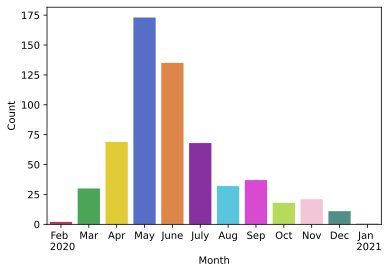

In [10]:
ax = sns.barplot(x='months', y='count', data=df12, palette=colors)
ax.set(xlabel='Month', ylabel='Count')
plt.savefig('lifted_count_by_month.jpeg', dpi=1200)

### Figure 9: imposed NPIs

[   5  153  367 3757  944  304  142  175   98   49   87  128   75   11]


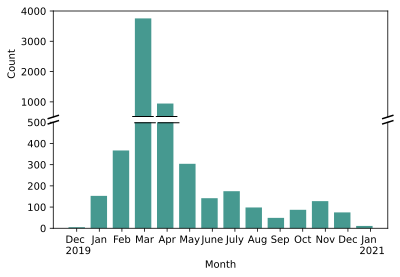

In [11]:
bin_edges = np.linspace(0, 14, 15) 
bin_centres = np.linspace(0.5, 14.5, 14) 
my_hist = df11['count'].to_numpy() 
fig=plt.figure()
ax = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax)

ax.bar(bin_centres, my_hist, color = '#469990') # plot on top axes
ax2.bar(bin_centres, my_hist, color = '#469990') # plot on bottom axes
ax.set_ylim([500,4000]) 
ax2.set_ylim([0, 500]) 
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.set(xlabel='Month', ylabel='Count') 
ax2.set_xticks(np.arange(0.5,15,1.1))
ax2.set_xticklabels(df11.months)
ax2.xaxis.tick_bottom()
ax2.hlines(y=500, xmin=3.3, xmax=4.35, linewidth=2, color='k') #lower bar
ax2.hlines(y=500, xmin=4.45, xmax=5.5, linewidth=2, color='k')
ax.hlines(y=500, xmin=3.2, xmax=4.25, linewidth=2, color='k')
ax.hlines(y=500, xmin=4.35, xmax=5.4, linewidth=2, color='k')
ax2.margins(x=0, y=-0.25) 
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)
ax.plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs)
ax2.set(xlabel='Month')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('imposed_count_by_month.jpeg', dpi=1200)
print(my_hist)

### Figure 10: travel and community NPIs 

#### Get Covid-19 NPIs Longitudinal Format
Generates csv files combining NPI data with WHO/ECDC Covid-19 outcomes

##### World NPIs

In [12]:
#load NPI datasets
npi_df = wntrac_events_df.copy()
replacements = {'2019-03-18':'2020-03-18', '2019-05-06':'2020-05-06'}
npi_df = npi_df.replace({'date' : replacements})
npi_df['date'] = pd.to_datetime(npi_df['date'])
npi_df = npi_df.replace({'country' : {'KOS':'KVX'}})

#2. Selected a subset of 13 NPIs for subsequent analysis.
exclusion_list = ['economic impact','contact tracing','changes in prison-related policies', 'domestic of movement','other']
npi_df_filtered = npi_df[~npi_df['type'].isin(exclusion_list)]

#3. Get only country-level data
npi_df_filtered = npi_df_filtered[(npi_df_filtered['state/province'].isna())|(npi_df_filtered['state/province']=='None')]


#4. Discard NPI events with future dates
date_string = '2021-01-11'
last_date = datetime.strptime(date_string, '%Y-%m-%d')
npi_df_filtered= npi_df_filtered[npi_df_filtered['date']<=last_date]

#5. select distinct country-NPI-date tuples
npi_df_filtered = npi_df_filtered.drop(['state/province','epoch','even_id','value'],axis=1).drop_duplicates().sort_values(['country', 'type', 'date'])
mask = npi_df_filtered['restriction']!= npi_df_filtered.groupby(['type','country'])['restriction'].shift(1)
npi_df_filtered = npi_df_filtered[mask]
npi_df_filtered['end_date'] = npi_df_filtered.groupby(['type','country','type'])['date'].shift(-1)
npi_df_filtered['end_date'] =npi_df_filtered['end_date'].fillna(last_date)

##### World Cases - WHO

In [13]:
countries = sorted(list(np.unique(npi_df_filtered['country'])))

iso_country_codes_json = territories_dict.copy()
iso_country_codes = pd.DataFrame(data=iso_country_codes_json)
iso_country_codes.rename(columns={'admin0_iso2': 'Alpha-2 code', 'admin0_iso3':'Alpha-3 code'}, inplace=True)
iso_country_codes = dict(zip(iso_country_codes['Alpha-2 code'], iso_country_codes['Alpha-3 code']))

who_case_df.columns = [i.strip().lower() for i in who_case_df.columns]
who_case_df['country_code'] = who_case_df.apply(lambda row: row.country_code if row.country != 'Other' else 'Other',
                                                axis=1)
#who_case_df =who_case_df.drop(['new_deaths','cumulative_deaths'], axis=1)
who_case_df['country_code'] = [iso_country_codes[i] if ((i != 'Other') & (i in iso_country_codes)) else i for i in who_case_df['country_code']]
who_case_df = who_case_df[who_case_df['country_code'].isin(countries)]
who_case_df['date_reported'] = pd.to_datetime(who_case_df['date_reported'])
who_case_df = who_case_df[who_case_df['date_reported']<last_date]

who_case_df['new_cases'] = who_case_df['new_cases'].astype(int)
who_case_df['cumulative_cases'] = who_case_df['cumulative_cases'].astype(int)
day_zero_one_case = {}
day_zero_fifty_cases = {}
day_zero_one_hundred_cases = {}
for country in countries:
    if country in set(who_case_df['country_code']):
        country_who_case_df = who_case_df[who_case_df['country_code']==country].copy()
        day_zero_one_case[country] = country_who_case_df['date_reported'][country_who_case_df['cumulative_cases']>=1].min()
        day_zero_fifty_cases[country] = country_who_case_df['date_reported'][country_who_case_df['cumulative_cases']>=50].min()
        day_zero_one_hundred_cases[country] = country_who_case_df['date_reported'][country_who_case_df['cumulative_cases']>=100].min()

who_case_df['days_since_first_case'] = who_case_df.apply(lambda x: (x.date_reported - day_zero_one_case[x.country_code]).days, axis=1)
who_case_df['days_since_fifty_cases'] = who_case_df.apply(lambda x: (x.date_reported - day_zero_fifty_cases[x.country_code]).days, axis=1)
who_case_df['days_since_one_hundred_cases'] = who_case_df.apply(lambda x: (x.date_reported - day_zero_one_hundred_cases[x.country_code]).days, axis=1)

who_case_df['new_cases_ewm7'] = who_case_df.groupby('country_code')['new_cases'].transform(lambda x: x.ewm(span=7).mean())
who_case_df['new_cases_sma7'] = who_case_df.groupby('country_code')['new_cases'].transform(lambda x: x.rolling(window=7).mean())
who_case_df['cumulative_cases_ewm7'] = who_case_df.groupby('country_code')['cumulative_cases'].transform(lambda x: x.ewm(span=7).mean())
who_case_df['cumulative_cases_sma7'] = who_case_df.groupby('country_code')['cumulative_cases'].transform(lambda x: x.rolling(window=7).mean())


who_case_df['new_deaths_ewm7'] = who_case_df.groupby('country_code')['new_deaths'].transform(lambda x: x.ewm(span=7).mean())
who_case_df['new_dealths_sma7'] = who_case_df.groupby('country_code')['new_deaths'].transform(lambda x: x.rolling(window=7).mean())
who_case_df['cumulative_deaths_ewm7'] = who_case_df.groupby('country_code')['cumulative_deaths'].transform(lambda x: x.ewm(span=7).mean())
who_case_df['cumulative_deaths_sma7'] = who_case_df.groupby('country_code')['cumulative_deaths'].transform(lambda x: x.rolling(window=7).mean())

# who_case_df.to_csv('who_case_df.csv', index=False)
who_case_df[who_case_df['country_code']=='AND'].tail(10)

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,days_since_first_case,days_since_fifty_cases,days_since_one_hundred_cases,new_cases_ewm7,new_cases_sma7,cumulative_cases_ewm7,cumulative_cases_sma7,new_deaths_ewm7,new_dealths_sma7,cumulative_deaths_ewm7,cumulative_deaths_sma7
1900,2021-01-01,AND,Andorra,EURO,66,8049,0,84,304,287.0,285.0,51.341478,50.000000,7894.975566,7887.000000,0.210896,0.142857,83.367313,83.428571
1901,2021-01-02,AND,Andorra,EURO,68,8117,0,84,305,288.0,286.0,55.506108,51.571429,7950.481675,7938.571429,0.158172,0.142857,83.525485,83.571429
1902,2021-01-03,AND,Andorra,EURO,49,8166,0,84,306,289.0,287.0,53.879581,51.428571,8004.361256,7990.000000,0.118629,0.142857,83.644114,83.714286
1903,2021-01-04,AND,Andorra,EURO,26,8192,0,84,307,290.0,288.0,46.909686,53.000000,8051.270942,8043.000000,0.088972,0.142857,83.733085,83.857143
1904,2021-01-05,AND,Andorra,EURO,57,8249,0,84,308,291.0,289.0,49.432265,53.428571,8100.703206,8096.428571,0.066729,0.142857,83.799814,84.000000
1905,2021-01-06,AND,Andorra,EURO,59,8308,0,84,309,292.0,290.0,51.824198,55.571429,8152.527405,8152.000000,0.050047,0.000000,83.849860,84.000000
1906,2021-01-07,AND,Andorra,EURO,40,8348,0,84,310,293.0,291.0,48.868149,52.142857,8201.395554,8204.142857,0.037535,0.000000,83.887395,84.000000
1907,2021-01-08,AND,Andorra,EURO,0,8348,0,84,311,294.0,292.0,36.651112,42.714286,8238.046665,8246.857143,0.028151,0.000000,83.915547,84.000000
1908,2021-01-09,AND,Andorra,EURO,141,8489,0,84,312,295.0,293.0,62.738334,53.142857,8300.784999,8300.000000,0.021113,0.000000,83.936660,84.000000
1909,2021-01-10,AND,Andorra,EURO,97,8586,1,85,313,296.0,294.0,71.303750,60.000000,8372.088749,8360.000000,0.265835,0.142857,84.202495,84.142857


##### US States NPIs

In [14]:
#2. Selected a subset of 13 NPIs for subsequent analysis.
exclusion_list = ['economic impact','contact tracing','changes in prison-related policies', 'domestic of movement','other']
npi_df_filtered = npi_df[~npi_df['type'].isin(exclusion_list)]

#3. Get only US state data
npi_df_filtered = npi_df_filtered[npi_df_filtered['country']=='USA'].copy()
npi_df_filtered = npi_df_filtered[~((npi_df_filtered['state/province'].isna())|(npi_df_filtered['state/province']=='None'))]

#4. Discard NPI events with future dates
last_date = datetime.strptime(date_string, '%Y-%m-%d')
npi_df_filtered= npi_df_filtered[npi_df_filtered['date']<=last_date]

#5. select distinct US State-NPI-date tuples
npi_df_filtered = npi_df_filtered.drop(['epoch','even_id','value'],axis=1).drop_duplicates().sort_values(['state/province', 'type', 'date'])
mask = npi_df_filtered['restriction']!= npi_df_filtered.groupby(['type','state/province'])['restriction'].shift(1)
npi_df_filtered = npi_df_filtered[mask]
npi_df_filtered['end_date'] = npi_df_filtered.groupby(['type','state/province','type'])['date'].shift(-1)
npi_df_filtered['end_date'] =npi_df_filtered['end_date'].fillna(last_date)

##### US States Cases - CDC

In [15]:
states = sorted(list(np.unique(npi_df_filtered['state/province'])))
us_cases['dt'] =pd.to_datetime(us_cases['dt'])
us_cases = us_cases.rename(columns={'dt': 'date_reported','confirmed_cases_delta':'new_cases', 'deaths_delta':'new_deaths'})
us_cases['province_id'] =[i.replace('US-','USA-') for i in us_cases['province_id']]
us_cases['date_reported'] = pd.to_datetime(us_cases['date_reported'],format="%d/%m/%Y")
us_cases=us_cases[us_cases['date_reported']<last_date]

day_zero_one_case = {}
day_zero_fifty_cases = {}
day_zero_one_hundred_cases = {}
for state in states:
    if state in set(us_cases['province_id']):
        state_cases = us_cases[us_cases['province_id']==state].copy()
        day_zero_one_case[state] = state_cases['date_reported'][state_cases['confirmed_cases']>=1].min()
        day_zero_fifty_cases[state] = state_cases['date_reported'][state_cases['confirmed_cases']>=50].min()
        day_zero_one_hundred_cases[state] = state_cases['date_reported'][state_cases['confirmed_cases']>=100].min()

us_cases['days_since_first_case'] = us_cases.apply(lambda x: (x.date_reported - day_zero_one_case[x.province_id]).days, axis=1)
us_cases['days_since_fifty_cases'] = us_cases.apply(lambda x: (x.date_reported - day_zero_fifty_cases[x.province_id]).days, axis=1)
us_cases['days_since_one_hundred_cases'] = us_cases.apply(lambda x: (x.date_reported - day_zero_one_hundred_cases[x.province_id]).days, axis=1)
us_cases['country_code'] = us_cases['province_name'].str.replace(' ', '')
us_cases['new_cases_ewm7'] = us_cases.groupby('country_code')['new_cases'].transform(lambda x: x.ewm(span=7).mean())
us_cases

,province_id,confirmed_cases,deaths,new_cases,new_deaths,date_reported,collected,country_id,province_name,days_since_first_case,days_since_fifty_cases,days_since_one_hundred_cases,country_code,new_cases_ewm7
0,USA-KY,5245,261,115,8,2020-05-04,05/05/2020 05:25:08 PM,US,Kentucky,58,44,43,Kentucky,115.000000
1,USA-OK,205999,1752,0,0,2020-12-08,12/09/2020 02:45:40 PM,US,Oklahoma,276,262,259,Oklahoma,0.000000
2,USA-MD,103523,3685,624,11,2020-08-21,08/22/2020 02:21:09 PM,US,Maryland,169,158,156,Maryland,624.000000
3,USA-GA,2,0,-5,0,2020-03-05,03/26/2020 04:22:39 PM,US,Georgia,5,-6,-8,Georgia,-5.000000
4,USA-WA,1,0,0,0,2020-02-08,03/26/2020 04:22:39 PM,US,Washington,17,-26,-28,Washington,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18923,USA-HI,0,0,0,0,2020-02-25,03/26/2020 04:22:39 PM,US,Hawaii,-9,-25,-28,Hawaii,43.185805
18924,USA-NC,68238,1391,1639,18,2020-07-02,11/13/2020 07:10:12 PM,US,North Carolina,122,106,104,NorthCarolina,1586.062878
18925,USA-RI,106,0,9,0,2020-03-23,03/26/2020 04:22:39 PM,US,Rhode Island,22,3,0,RhodeIsland,255.607765
18926,USA-DC,10847,568,46,0,2020-07-12,07/13/2020 03:19:34 PM,US,District of Columbia,127,115,112,DistrictofColumbia,57.734058


##### Functions to find time difference from first NPI to first death 

In [16]:
# The purpose of these functions is to match first NPI with first death or 50 confirmed cases, 
# and find out the time deference between them
# 
# The output of the function:
def add_NPI_data(df_NPIs, df_covid_data, cm_date_col='date', cm_country_col='country', npi_col='event_name',
                 end_date_str=None, start_date_str=None, remove_NPIs=[], inf_date_col='date',
                 inf_country_col='country_code', start_from_50_cases=True):
    
    
    df_NPIs[cm_date_col] = pd.to_datetime(df_NPIs[cm_date_col])  # 'date'
    df_covid_data[inf_date_col] = pd.to_datetime(df_covid_data[inf_date_col])  # date_reported
    if end_date_str is not None:
        end_date = datetime.strptime(end_date_str, '%m/%d/%Y')
        df_NPIs = df_NPIs[(df_NPIs[cm_date_col] < end_date)]
        df_covid_data = df_covid_data[(df_covid_data[inf_date_col] < end_date)]
    if start_date_str is not None:
        start_date = datetime.strptime(start_date_str, '%m/%d/%Y')
        df_NPIs = df_NPIs[(df_NPIs[cm_date_col] > start_date)]
        df_covid_data = df_covid_data[(df_covid_data[inf_date_col] > start_date)]
    if len(remove_NPIs) > 0:
        df_NPIs = df_NPIs[~df_NPIs[npi_col].isin(remove_NPIs)]
    first_CM_to_first_infection = {}
    states = df_covid_data[inf_country_col].unique() 
    for state in states:
        # select curr state data only
        df_npis_ = df_NPIs[df_NPIs[cm_country_col] == state]
        df_inf_ = df_covid_data[df_covid_data[inf_country_col] == state]
        df_npis_.sort_values(by=cm_date_col, inplace=True, ascending=True)
        df_inf_.sort_values(by=inf_date_col, inplace=True, ascending=True)
        country_name = df_inf_[inf_country_col].values[0]
        if start_from_50_cases:
            df_inf_ = df_inf_[df_inf_['days_since_fifty_cases'] > 0]
        # filter state if negative
        if (df_inf_.new_cases_ewm7 < -1).any():
            neg_indx = df_inf_[df_inf_.new_cases_ewm7 < -1].index[0]
            df_inf_ = df_inf_.drop(df_inf_.index[np.where(np.array(df_inf_.index) == neg_indx)[0][0]:])
        if len(df_npis_) < 1:
            print('--- add_NPI_data: less than 1 NPI for: ', state)
            print(len(df_npis_))
            print(df_NPIs.columns.values)
            continue
        first_CM_to_first_infection[country_name] = []
        cc_npi = get_days_from_NPI(df_npis_, df_inf_, col1='new_cases', col2=npi_col)  # confirmed_cases
        dth_npi = get_days_from_NPI(df_npis_, df_inf_, col1='new_deaths', col2=npi_col)  # deaths
        if any(isinstance(el, list) for el in cc_npi):
            first_CM_to_first_infection[country_name] = first_CM_to_first_infection[country_name] + cc_npi[0]
            first_CM_to_first_infection[country_name] = first_CM_to_first_infection[country_name] + dth_npi[0]
        else:
            first_CM_to_first_infection[country_name] = first_CM_to_first_infection[country_name] + cc_npi
            first_CM_to_first_infection[country_name] = first_CM_to_first_infection[country_name] + dth_npi
        first_CM_to_first_infection[state].append(df_inf_['country'].values[0])

    return pd.DataFrame.from_dict(first_CM_to_first_infection, orient='index',
                                  columns=['first_NPI_to_first_cc', 'first_NPI_cc', 'first_NPIcc_date',
                                           'first_cc_date'] + \
                                          ['first_NPI_to_first_dth', 'first_NPI_dth', 'first_NPIdth_date',
                                           'first_dth_date', 'Country'])


def get_days_from_NPI(df_cm_, df_inf_, col1, col2):
    try:
        first_and_second_list = get_first_NPI_to_first_inf_diff(df_cm_, df_inf_, col1, col2)
    except:
        first_and_second_list = []
    return first_and_second_list


def get_first_NPI_to_first_inf_diff(df_cm_, df_inf_, col1='confirmed_cases', col2='event_name'):
    first_NPI_date = df_cm_['date'].values[0]
    df_inf_ = df_inf_.reset_index()
    idx = df_inf_[col1].ne(0).idxmax()
    first_infect_date = df_inf_['date'].iloc[idx]
    first_CM_to_first_inf = (pd.Timestamp(first_NPI_date) - first_infect_date).days
    if len(np.unique(df_cm_[[col2]][df_cm_['date'] == df_cm_['date'].values[
        0]].values)) > 1:  # df_cm_['date'].values[0] == df_cm_['date'].values[1]:
        list_l = []
        for cl2_val in np.unique(df_cm_[[col2]][df_cm_['date'] == df_cm_['date'].values[0]].values):
            list_l.append([first_CM_to_first_inf, cl2_val, first_NPI_date, first_infect_date])
        return list_l
    return [first_CM_to_first_inf, df_cm_[col2].values[0], first_NPI_date, first_infect_date]

##### Define travel and community NPIs

In [17]:
travel_npis = ['international flight restrictions', 'domestic flight restriction',
                   'freedom of movement (nationality dependent)', 'introduction of travel quarantine policies', 'other']

community_npis = ['school closure', 'entertainment/cultural sector closure', 'confinement',
             'mask wearing', 'economic impact', 'mass gatherings',
             'public services closure', 'state of emergency (legal impact)',
             'public transportation', 'work restrictions',
             'changes in prison-related policies', 'contact tracing', 'other']

selected_countries = ['Germany','Brazil', 'South Africa','Israel','France','Italy',
                                                                               'The United Kingdom','Singapore','USA-NY']

##### Create travel and community dataframes

In [18]:
event_approved =  wntrac_events_df.copy()
who_data = who_case_df
who_data_us = us_cases

who_data = who_data[who_data['country'].isin(selected_countries)]
selected_countries_codes = who_data.country_code.unique()
selected_countries_codes = who_data.country_code.unique()
event_approved_countries = event_approved[event_approved['country'].isin(selected_countries_codes)]
event_approved_states = event_approved[event_approved['state/province'].isin(['USA-NY'])]
event_approved_countries.country.unique()
event_approved_all = pd.concat([event_approved_countries, event_approved_states], ignore_index=True)
event_approved_all['country'].replace({'USA':'NewYork'}, inplace=True)
event_approved_all.country.unique()
# event_approved_all['state/province'].unique()

array(['ZAF', 'ITA', 'FRA', 'GBR', 'ISR', 'DEU', 'SGP', 'BRA', 'NewYork'],
      dtype=object)

##### Merge global and US data

In [19]:
who_data_us_ny = who_data_us[who_data_us['province_id'].isin(['USA-NY'])]
who_data_us_ny = who_data_us_ny.rename(columns={"province_id": "country"}, inplace=False)
who_data_cols = ["date_reported","country_code","country","days_since_fifty_cases","new_cases","new_deaths",'new_cases_ewm7']
who_data_ = who_data[who_data_cols]
who_data_us_ny_ = who_data_us_ny[who_data_cols]
who_data_all = pd.concat([who_data_, who_data_us_ny_], ignore_index=True)
who_data_all.rename(columns={"date_reported": 'date'}, inplace=True)
who_data_all.head()

,date,country_code,country,days_since_fifty_cases,new_cases,new_deaths,new_cases_ewm7
0,2020-01-03,BRA,Brazil,-69.0,0,0,0.0
1,2020-01-04,BRA,Brazil,-68.0,0,0,0.0
2,2020-01-05,BRA,Brazil,-67.0,0,0,0.0
3,2020-01-06,BRA,Brazil,-66.0,0,0,0.0
4,2020-01-07,BRA,Brazil,-65.0,0,0,0.0


##### Find time from first NPI to first death or 50 confirmed cases

In [20]:
first_CM_to_first_infection_community = add_NPI_data(event_approved_all, who_data_all, cm_country_col='country',
                                                                  npi_col='type', start_date_str = '12/01/2019',
                                                                  remove_NPIs=travel_npis,
                                                                  inf_country_col='country_code')

first_CM_to_first_infection_travel = add_NPI_data(event_approved_all, who_data_all, cm_country_col='country',
                                                                  npi_col='type',
                                                                  remove_NPIs=community_npis,
                                                                  inf_country_col='country_code')

##### Prepare data and plot figures

In [21]:
travel_related_NPIs = first_CM_to_first_infection_travel 
community_related_NPIs = first_CM_to_first_infection_community 
travel_related_NPIs['Country'].replace({'US-NY':'USA-NY'}, inplace=True)
community_related_NPIs['Country'].replace({'US-NY':'USA-NY'}, inplace=True)
travel_related_NPIs = travel_related_NPIs[travel_related_NPIs['Country'].isin(['Germany','Brazil', 'South Africa','Israel','France','Italy',
                                                                               'The United Kingdom','Singapore','USA-NY'])]
community_related_NPIs = community_related_NPIs[community_related_NPIs['Country'].isin(['Germany','Brazil', 
                                                                                        'South Africa','Israel','France','Italy','The United Kingdom','Singapore','USA-NY'])]

travel_related_NPIs['Country'].unique()

array(['Brazil', 'France', 'Germany', 'Israel', 'Italy', 'Singapore',
       'South Africa', 'The United Kingdom', 'USA-NY'], dtype=object)

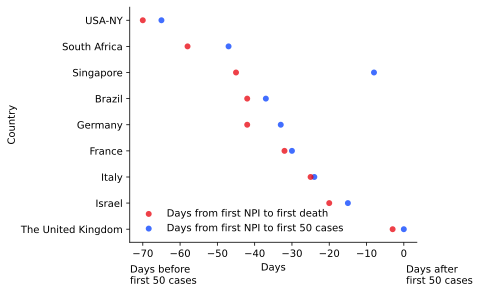

In [22]:
fig, ax = plt.subplots()
widths = np.ones(10).tolist()
sns.set_color_codes('muted')
community_related_NPIs.sort_values(by='first_NPI_to_first_dth', inplace=True, ascending=True)
sns.set_color_codes('bright') 
sns.swarmplot(x="first_NPI_to_first_cc",  y = 'Country', data = community_related_NPIs, 
              label = 'Days from first NPI to first 50 cases', color="b", size = 6, alpha=.75)
sns.swarmplot(x="first_NPI_to_first_dth",  y = 'Country', data = community_related_NPIs, 
              label = 'Days from first NPI to first death', color="r", size= 6, alpha=.75)
sns.despine(left = False, bottom = False, top = True, right = True)
handles, labels = ax.get_legend_handles_labels()
b=[-2, -12]
ax.legend([handles[i] for i in b],[labels[i] for i in b],loc = 'lower left',frameon=False)
plt.xlabel('Days', ha="center") # from first travel NPI to first death / first 50 cases
plt.figtext(0.31, 0.001, "Days before\nfirst 50 cases", ha="left", fontsize=10)
plt.figtext(0.95, 0.001, "Days after\nfirst 50 cases", ha="left", fontsize=10)
fig.tight_layout()

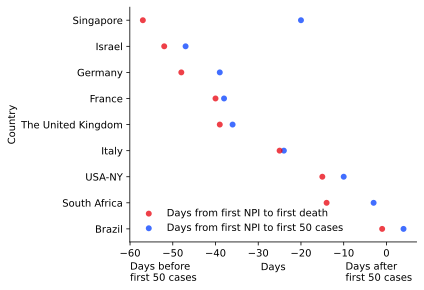

In [23]:
travel_related_NPIs.sort_values(by='first_NPI_to_first_dth', inplace=True, ascending=True)
fig, ax = plt.subplots() #figsize = (2,3)
sns.set_color_codes('bright') 
sns.swarmplot(x="first_NPI_to_first_cc",  y = 'Country', data = travel_related_NPIs, 
              label = 'Days from first NPI to first 50 cases',color="b", size= 6,alpha=.75)
sns.swarmplot(x="first_NPI_to_first_dth",  y = 'Country', data = travel_related_NPIs, 
              label = 'Days from first NPI to first death',color="r", size= 6,alpha=.75)
sns.despine(left = False, bottom = False, top = True, right = True)
ax.legend(handles[-2:], labels[-2:])
plt.xlabel('Days')
handles, labels = ax.get_legend_handles_labels()
b=[-2, -12]

ax.legend([handles[i] for i in b],[labels[i] for i in b],loc = 'lower left',frameon=False)
plt.xlabel('Days') 
plt.figtext(0.31, 0.01, "Days before\nfirst 50 cases", ha="left", fontsize=10)
plt.figtext(0.81, 0.01, "Days after\nfirst 50 cases", ha="left", fontsize=10)
fig.tight_layout()

### Figure 12

In [24]:
#1. load NPI datasets
npi_df = wntrac_events_df.copy()
replacements = {'2019-03-18':'2020-03-18', '2019-05-06':'2020-05-06'}
npi_df = npi_df.replace({'date' : replacements})
npi_df['date'] = pd.to_datetime(npi_df['date'])
npi_df = npi_df.replace({'country' : {'KOS':'KVX'}})
npi_df[(~npi_df['state/province'].isna()) & (npi_df['country']!='USA')].tail(10)

,type,country,state/province,epoch,even_id,date,value,restriction
6602,freedom of movement (nationality dependent),DEN,DEN-FI,1.604880e+12,0dbdea14-2416-11eb-82f1-eeee0af590c3,2020-11-09,all,1
6712,international flight restrictions,CHN,CHN-HK,1.605917e+12,0e85a2b4-2e4a-11eb-9e0e-eeee0af6003f,2020-11-21,SGP,1
6730,freedom of movement (nationality dependent),CHN,CHN-HK,1.597709e+12,b407e088-33d8-11eb-b1fc-eeee0af61a19,2020-08-18,other,1
6754,school closure,CHN,CHN-HK,1.607040e+12,aba1f472-3df8-11eb-9ec3-eeee0af787fe,2020-12-04,Only schools (primary/secondary) closed,1
6755,entertainment/cultural sector closure,CHN,CHN-HK,1.607040e+12,c09954a6-3df8-11eb-b892-eeee0af54a85,2020-12-04,"Bars, restaurants, night clubs",1
6811,school closure,CHN,CHN-HK,1.606867e+12,82fa989a-5012-11eb-aa8d-eeee0af787fe,2020-12-02,All schools (general) closed,1
6812,entertainment/cultural sector closure,CHN,CHN-HK,1.607558e+12,93fe7ea4-5012-11eb-9e0a-eeee0af54a85,2020-12-10,"Bars, restaurants, night clubs",1
6832,entertainment/cultural sector closure,CHN,CHN-HK,1.607558e+12,c6c87b94-508c-11eb-b8a4-eeee0af54a85,2020-12-10,other,1
6838,school closure,CHN,CHN-HK,1.581466e+12,bdaa9f90-508e-11eb-9726-eeee0af4c348,2020-02-12,All schools (general) closed,1
6839,school closure,CHN,CHN-HK,1.606608e+12,d26496fc-508e-11eb-81e6-eeee0af7472c,2020-11-29,All schools (general) closed,1


In [25]:
#2. Selected a subset of 13 NPIs for subsequent analysis.
exclusion_list = ['economic impact','contact tracing','changes in prison-related policies', 'domestic of movement','other']
npi_df_filtered = npi_df[~npi_df['type'].isin(exclusion_list)]
npi_df_filtered

,type,country,state/province,epoch,even_id,date,value,restriction
0,introduction of travel quarantine policies,COM,NaN,1.585699e+12,02cf87e0-bcfe-11ea-b7bb-eeee0af7a662,2020-04-01,na,1
1,school closure,ZAF,NaN,1.584835e+12,07280ce6-c072-11ea-87f4-eeee0af469a3,2020-03-22,Only schools (primary/secondary) closed,1
2,entertainment/cultural sector closure,NGA,NaN,1.585008e+12,2ae3ffb2-c0e7-11ea-908e-eeee0af49f8d,2020-03-24,Churches,1
3,entertainment/cultural sector closure,COL,NaN,1.593907e+12,062dec18-c0ed-11ea-a39b-eeee0af72e81,2020-07-05,"Bars, restaurants, night clubs",1
4,entertainment/cultural sector closure,CMR,NaN,1.622506e+12,78de17bc-c2bc-11ea-9397-eeee0af6ea14,2021-06-01,na,1
...,...,...,...,...,...,...,...,...
6948,mass gatherings,DEU,NaN,1.609805e+12,6e54ca98-511e-11eb-bdf3-eeee0af5f8ba,2021-01-05,1,1
6949,freedom of movement (nationality dependent),ISR,NaN,1.608422e+12,8f87da20-511e-11eb-bd2f-eeee0af5f8ba,2020-12-20,"DNK,GBR,ZAF",1
6950,confinement,ISR,NaN,1.608422e+12,a580a924-511e-11eb-b62a-eeee0af787fe,2020-12-20,other,1
6951,confinement,ISR,NaN,1.609805e+12,b304957e-511e-11eb-b9c2-eeee0af7472c,2021-01-05,Mandatory/advisedfor all the population,1


In [26]:
#3. Get only US state data
npi_df_filtered = npi_df_filtered[npi_df_filtered['country']=='USA'].copy()
npi_df_filtered = npi_df_filtered[~((npi_df_filtered['state/province'].isna())|(npi_df_filtered['state/province']=='None'))]
npi_df_filtered

,type,country,state/province,epoch,even_id,date,value,restriction
15,school closure,USA,USA-ME,1.588982e+12,9c0344fa-c6b9-11ea-b869-eeee0af69709,2020-05-09,na,1
16,school closure,USA,USA-TX,1.583626e+12,11ed8ecc-c706-11ea-9eea-eeee0af524cd,2020-03-08,Universities closed,1
17,entertainment/cultural sector closure,USA,USA-NV,1.591229e+12,aca19330-c70d-11ea-b074-eeee0af688fb,2020-06-04,"Museums, theaters, cinema, libraries, festivities",0
20,entertainment/cultural sector closure,USA,USA-GA,1.587686e+12,2a49aa92-c6b0-11ea-ac4c-eeee0af76b9f,2020-04-24,"Museums, theaters, cinema, libraries, festivities",0
43,state of emergency (legal impact),USA,USA-MD,1.583971e+12,15d24770-f461-432b-ae26-3f66e0a084a6,2020-03-12,National guard joins the law enforcement,1
...,...,...,...,...,...,...,...,...
6927,introduction of travel quarantine policies,USA,USA-PA,1.625184e+12,9c990da2-5113-11eb-8458-eeee0af787fe,2021-07-02,other,1
6929,entertainment/cultural sector closure,USA,USA-HI,1.608768e+12,860e19d0-511b-11eb-86bc-eeee0af787fe,2020-12-24,Parks and public gardens,1
6930,entertainment/cultural sector closure,USA,USA-HI,1.608768e+12,8d2963b4-511b-11eb-adde-eeee0af54a85,2020-12-24,"Bars, restaurants, night clubs",1
6931,confinement,USA,USA-HI,1.608768e+12,aac47fbc-511b-11eb-ac9b-eeee0af7472c,2020-12-24,other,1


In [27]:
#4. Discard NPI events with future dates
date_string = '2021-01-07'
last_date = datetime.strptime(date_string, '%Y-%m-%d')
npi_df_filtered= npi_df_filtered[npi_df_filtered['date']<=last_date]
npi_df_filtered.tail(5)

,type,country,state/province,epoch,even_id,date,value,restriction
6877,state of emergency (legal impact),USA,USA-MN,1.584058e+12,1f301300-50b5-11eb-a656-eeee0af787fe,2020-03-13,other,1
6878,state of emergency (legal impact),USA,USA-CA,1.583107e+12,5941bf70-50b6-11eb-a4ac-eeee0af787fe,2020-03-02,other,1
6929,entertainment/cultural sector closure,USA,USA-HI,1.608768e+12,860e19d0-511b-11eb-86bc-eeee0af787fe,2020-12-24,Parks and public gardens,1
6930,entertainment/cultural sector closure,USA,USA-HI,1.608768e+12,8d2963b4-511b-11eb-adde-eeee0af54a85,2020-12-24,"Bars, restaurants, night clubs",1
6931,confinement,USA,USA-HI,1.608768e+12,aac47fbc-511b-11eb-ac9b-eeee0af7472c,2020-12-24,other,1


In [28]:
#5. select distinct US State-NPI-date tuples
npi_df_filtered = npi_df_filtered.drop(['epoch','even_id','value'],axis=1).drop_duplicates().sort_values(['state/province', 'type', 'date'])
mask = npi_df_filtered['restriction']!= npi_df_filtered.groupby(['type','state/province'])['restriction'].shift(1)
npi_df_filtered = npi_df_filtered[mask]
npi_df_filtered['end_date'] = npi_df_filtered.groupby(['type','state/province','type'])['date'].shift(-1)
npi_df_filtered['end_date'] =npi_df_filtered['end_date'].fillna(last_date)
npi_df_filtered

,type,country,state/province,date,restriction,end_date
2614,confinement,USA,USA-AK,2020-03-21,1,2021-01-07
2603,entertainment/cultural sector closure,USA,USA-AK,2020-03-18,1,2021-01-07
5337,freedom of movement (nationality dependent),USA,USA-AK,2020-03-22,1,2021-01-07
2278,state of emergency (legal impact),USA,USA-AK,2020-03-11,1,2021-01-07
4994,work restrictions,USA,USA-AK,2020-03-22,1,2021-01-07
...,...,...,...,...,...,...
5958,state of emergency (legal impact),USA,USA-WV,2020-03-16,1,2021-01-07
742,entertainment/cultural sector closure,USA,USA-WY,2020-03-01,1,2021-01-07
1576,introduction of travel quarantine policies,USA,USA-WY,2020-06-01,1,2021-01-07
3561,school closure,USA,USA-WY,2020-03-15,1,2020-05-15


In [29]:
#get npi date ranges
npi_date_ranges = dict()
for state in list(set(npi_df_filtered['state/province'])):
    state_npi_date_ranges = dict()
    state_npi_list = list(set(npi_df_filtered['type'][npi_df_filtered['state/province']==state]))
    for npi in state_npi_list:
        state_npi_df =  npi_df_filtered[(npi_df_filtered['state/province']==state) & (npi_df_filtered['type']==npi)].copy()
        state_npi_df['date_range'] = state_npi_df.apply(lambda row: pd.date_range(start= row.date, end=row.end_date, closed='left'), axis=1)
        imposed_range = list(state_npi_df['date_range'][state_npi_df['restriction']==1])
        imposed_range_dict = {item: 1 for sublist in imposed_range for item in sublist}
        lifted_range = state_npi_df['date_range'][state_npi_df['restriction']==0]
        lifted_range_dict =  {item:0 for sublist in lifted_range for item in sublist}
        restriction = {**imposed_range_dict, **lifted_range_dict}
        state_npi_date_ranges[npi] =restriction
    npi_date_ranges[state] = state_npi_date_ranges
# npi_date_ranges['USA-NY']['confinement']     


In [30]:
#get list of US states
states = sorted(list(np.unique(npi_df_filtered['state/province'])))

In [31]:
#Get US case data
us_cases = wntrac_npi_index.copy()
us_cases['date'] =pd.to_datetime(us_cases['date'])

us_cases = us_cases.rename(columns={'date': 'date_reported','confirmed_cases_delta':'new_cases', 'admin1_name':'province_name'})
us_cases['province_id'] =[i.replace('US-','USA-') for i in us_cases['admin1_iso2']]
us_cases['date_reported'] = pd.to_datetime(us_cases['date_reported'])
us_cases=us_cases[us_cases['date_reported']<last_date]

day_zero_one_case = {}
day_zero_fifty_cases = {}
day_zero_one_hundred_cases = {}
for state in states:
    if state in set(us_cases['province_id']):
        state_cases = us_cases[us_cases['province_id']==state].copy()
        day_zero_one_case[state] = state_cases['date_reported'][state_cases['confirmed_cases']>=1].min()
        day_zero_fifty_cases[state] = state_cases['date_reported'][state_cases['confirmed_cases']>=50].min()
        day_zero_one_hundred_cases[state] = state_cases['date_reported'][state_cases['confirmed_cases']>=100].min()

us_cases['days_since_first_case'] = us_cases.apply(lambda x: (x.date_reported - day_zero_one_case[x.province_id]).days, axis=1)
us_cases['days_since_fifty_cases'] = us_cases.apply(lambda x: (x.date_reported - day_zero_fifty_cases[x.province_id]).days, axis=1)
us_cases['days_since_one_hundred_cases'] = us_cases.apply(lambda x: (x.date_reported - day_zero_one_hundred_cases[x.province_id]).days, axis=1)
us_cases[['date_reported','days_since_first_case','confirmed_cases','new_cases']][us_cases['province_id']=='USA-NY'].tail(15)


,date_reported,days_since_first_case,confirmed_cases,new_cases
15572,2020-12-23,294,487062,7564
15642,2020-12-24,295,494968,7906
15681,2020-12-25,296,503243,8275
15741,2020-12-26,297,510100,6857
15768,2020-12-27,298,514881,4781
15827,2020-12-28,299,521765,6884
15870,2020-12-29,300,528633,6868
15925,2020-12-30,301,537345,8712
15968,2020-12-31,302,548154,10809
16056,2021-01-01,303,559358,11204


In [32]:
npi_list = sorted(list(np.unique(npi_df_filtered['type'])))
npi_list = [i for i in npi_list if i not in exclusion_list]
npi_list

['confinement',
 'domestic flight restriction',
 'entertainment/cultural sector closure',
 'freedom of movement (nationality dependent)',
 'international flight restrictions',
 'introduction of travel quarantine policies',
 'mask wearing',
 'mass gatherings',
 'public services closure',
 'public transportation',
 'school closure',
 'state of emergency (legal impact)',
 'work restrictions']

In [33]:
def update_outliers(state, day_since_fifty_cases, col, dat):
    #get 14 window period
    window_period = range(day_since_fifty_cases-7, day_since_fifty_cases+8)
    #get data for window_period
    state_data = dat[dat['province_id']==state].copy()
    case_counts = list(state_data[col][state_data['days_since_fifty_cases'].isin(window_period)])
    q5, q95 = np.percentile(case_counts, [5,95])
    no_of_cases_on_day = state_data[col][state_data['days_since_fifty_cases'] == day_since_fifty_cases].iloc[0]
    if no_of_cases_on_day in [np.min(case_counts), np.max(case_counts)]:
        if (no_of_cases_on_day < q5) or (no_of_cases_on_day > q95):
            return np.median(case_counts)    
    return no_of_cases_on_day

us_cases['new_cases'] = us_cases.apply(lambda x: update_outliers(x.province_id, x.days_since_fifty_cases, 'new_cases', us_cases) if x.days_since_fifty_cases >=0 else x.new_cases, axis = 1)



In [34]:
us_case_npi_df= us_cases.copy()

def get_npi_status(state, npi, date,npi_date_ranges):
    if date in npi_date_ranges[state][npi].keys():
        return npi_date_ranges[state][npi][date]
    return 0
    
for npi in npi_list:
    #get list of states with npi
    npi_states = list(set(npi_df_filtered['state/province'][npi_df_filtered['type']==npi]))
    npi_colname = npi.replace(' ','_').replace('/','_or_').replace('(','_').replace(')','').replace('__','_')
    us_case_npi_df[npi_colname] = us_case_npi_df.apply(lambda row: get_npi_status(row.province_id, npi, row.date_reported,npi_date_ranges) if (row.province_id in npi_states) else 0, axis=1)
us_case_npi_df.to_csv('us_cases_npis.csv', index = False)
us_case_npi_df[us_case_npi_df['province_id']=='USA-NY'].head(10)

,date_reported,deaths,confirmed_cases,new_cases,observed_mobility_wntrac,si_wntrac,anticipated_mobility_wntrac,mobility_ratio_wntrac,adherence_wntrac,npi_index_wntrac,...,freedom_of_movement_nationality_dependent,international_flight_restrictions,introduction_of_travel_quarantine_policies,mask_wearing,mass_gatherings,public_services_closure,public_transportation,school_closure,state_of_emergency_legal_impact,work_restrictions
27,2020-02-15,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
43,2020-02-16,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
81,2020-02-17,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
106,2020-02-18,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
143,2020-02-19,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
162,2020-02-20,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
197,2020-02-21,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
228,2020-02-22,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
257,2020-02-23,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0
294,2020-02-24,0,0,0.0,0.0,2.083333,3.17614,0.0,1.0,51.041667,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Load data with indices
dat = wntrac_npi_index.copy()
dat['date'] =pd.to_datetime(dat['date'])
dat = dat[dat['admin0_name']=='United States'].copy()
dat = dat.rename(columns={'admin1_name': 'state'})
dat

,date,deaths,confirmed_cases,confirmed_cases_delta,observed_mobility_wntrac,si_wntrac,anticipated_mobility_wntrac,mobility_ratio_wntrac,adherence_wntrac,npi_index_wntrac,...,anticipated_mobility_oxcgrt,mobility_ratio_oxcgrt,adherence_oxcgrt,npi_index_oxcgrt,admin0_name,admin0_iso2,state,admin1_iso2,admin,population
0,2020-02-15,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.064731,0.0,1.0,52.780,United States,US,Illinois,US-IL,Illinois(US-IL),12821497
1,2020-02-15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.720097,0.0,1.0,52.780,United States,US,Nebraska,US-NE,Nebraska(US-NE),1904760
2,2020-02-15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.874633,-1.0,0.0,4.165,United States,US,Minnesota,US-MN,Minnesota(US-MN),5527358
3,2020-02-15,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.853722,0.0,1.0,52.780,United States,US,Arizona,US-AZ,Arizona(US-AZ),6946685
4,2020-02-15,0,8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.381685,-1.0,0.0,4.165,United States,US,California,US-CA,California(US-CA),39148760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16880,2021-01-17,3004,361609,1802,-6.065991,28.125000,-2.837831,0.0,1.0,64.062500,...,-2.573546,0.0,1.0,67.130,United States,US,Oklahoma,US-OK,Oklahoma(US-OK),3918137
16881,2021-01-17,1607,155554,278,-10.123763,8.333333,-3.041490,0.0,1.0,54.166667,...,-1.670132,0.0,1.0,70.370,United States,US,Idaho,US-ID,Idaho(US-ID),1687809
16882,2021-01-17,1092,89393,337,-10.192672,14.583333,-7.663253,0.0,1.0,57.291667,...,-3.320612,0.0,1.0,68.980,United States,US,Montana,US-MT,Montana(US-MT),1041732
16883,2021-01-17,1016,70294,922,-42.210027,27.083333,-28.435163,0.0,1.0,63.541667,...,-23.682448,0.0,1.0,82.405,United States,US,Delaware,US-DE,Delaware(US-DE),949495


In [36]:
#Create dictionary for each index
stringency_index_wntrac = dict()
npi_index_wntrac = dict()
stringency_index_oxcgrt = dict()
npi_index_oxcgrt = dict()

for state in set(dat['state']):
    state_stringency_wntrac = dict()
    state_npi_index_wntrac = dict()
    state_stringency_index_oxcgrt = dict()
    state_npi_index_oxcgrt = dict()
    
    state_dat = dat[dat['state']==state]
    for date in set(state_dat['date']):
        state_stringency_wntrac[date] = state_dat['si_wntrac'][state_dat['date']==date].iloc[0]
        state_npi_index_wntrac[date] = state_dat['npi_index_wntrac'][state_dat['date']==date].iloc[0]
        state_stringency_index_oxcgrt[date] = state_dat['si_oxcgrt'][state_dat['date']==date].iloc[0]
        state_npi_index_oxcgrt[date] = state_dat['npi_index_oxcgrt'][state_dat['date']==date].iloc[0]
        
    stringency_index_wntrac[state] = state_stringency_wntrac
    npi_index_wntrac[state] = state_npi_index_wntrac
    stringency_index_oxcgrt[state] = state_stringency_index_oxcgrt
    npi_index_oxcgrt[state] = state_npi_index_oxcgrt

In [37]:
def get_stringency(state, date, stringency):
    if state in stringency.keys():
        if date in stringency[state].keys():
            return stringency[state][date]/100
        return None
    return None
us_case_npi_df['oxcgrt_si'] = us_case_npi_df.apply(lambda x: get_stringency(x.province_name, x.date_reported, stringency_index_oxcgrt), axis = 1)
us_case_npi_df['wntrac_si'] = us_case_npi_df.apply(lambda x: get_stringency(x.province_name, x.date_reported, stringency_index_wntrac), axis = 1)
us_case_npi_df[['date_reported','oxcgrt_si','wntrac_si']][us_case_npi_df['province_id'] == 'USA-NY'].tail(10)

,date_reported,oxcgrt_si,wntrac_si
15827,2020-12-28,0.6991,0.270833
15870,2020-12-29,0.6991,0.270833
15925,2020-12-30,0.6991,0.270833
15968,2020-12-31,0.6991,0.270833
16056,2021-01-01,0.6991,0.270833
16083,2021-01-02,0.6991,0.270833
16135,2021-01-03,0.6991,0.270833
16209,2021-01-04,0.6991,0.270833
16242,2021-01-05,0.6620,0.270833
16316,2021-01-06,0.6620,0.270833


In [38]:
def get_npi_index(state, date, npi_index):
    if state in npi_index.keys():
        if date in npi_index[state].keys():
            return npi_index[state][date]/100
        return None
    return None
us_case_npi_df['oxcgrt_npi_index'] = us_case_npi_df.apply(lambda x: get_npi_index(x.province_name, x.date_reported, npi_index_oxcgrt), axis = 1)
us_case_npi_df['wntrac_npi_index'] = us_case_npi_df.apply(lambda x: get_npi_index(x.province_name, x.date_reported, npi_index_wntrac), axis = 1)
us_case_npi_df[['date_reported','oxcgrt_si','wntrac_si','oxcgrt_npi_index','wntrac_npi_index']][us_case_npi_df['province_id'] == 'USA-NY'].tail(10)


,date_reported,oxcgrt_si,wntrac_si,oxcgrt_npi_index,wntrac_npi_index
15827,2020-12-28,0.6991,0.270833,0.84955,0.635417
15870,2020-12-29,0.6991,0.270833,0.84955,0.635417
15925,2020-12-30,0.6991,0.270833,0.84955,0.635417
15968,2020-12-31,0.6991,0.270833,0.84955,0.635417
16056,2021-01-01,0.6991,0.270833,0.84955,0.635417
16083,2021-01-02,0.6991,0.270833,0.84955,0.635417
16135,2021-01-03,0.6991,0.270833,0.84955,0.635417
16209,2021-01-04,0.6991,0.270833,0.84955,0.635417
16242,2021-01-05,0.6620,0.270833,0.83100,0.635417
16316,2021-01-06,0.6620,0.270833,0.83100,0.635417


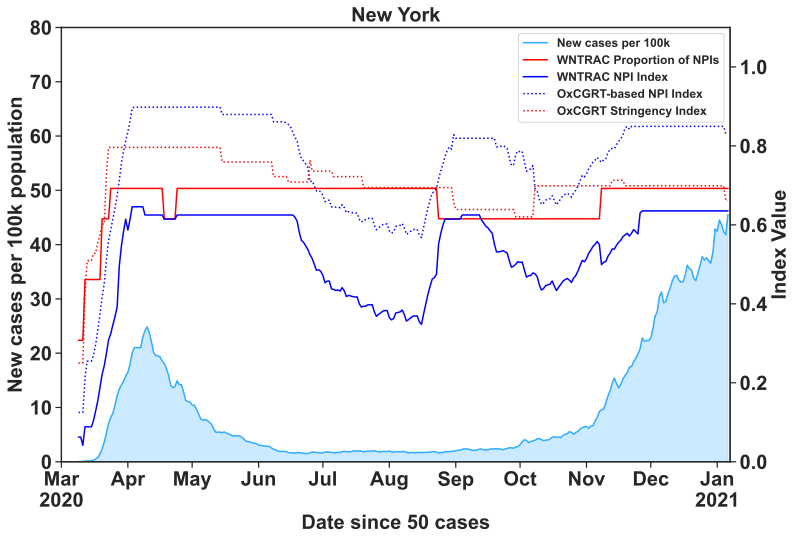

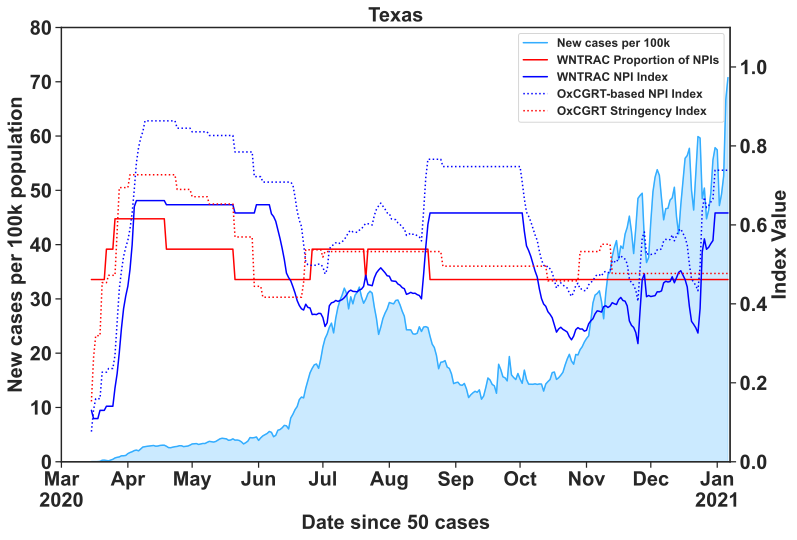

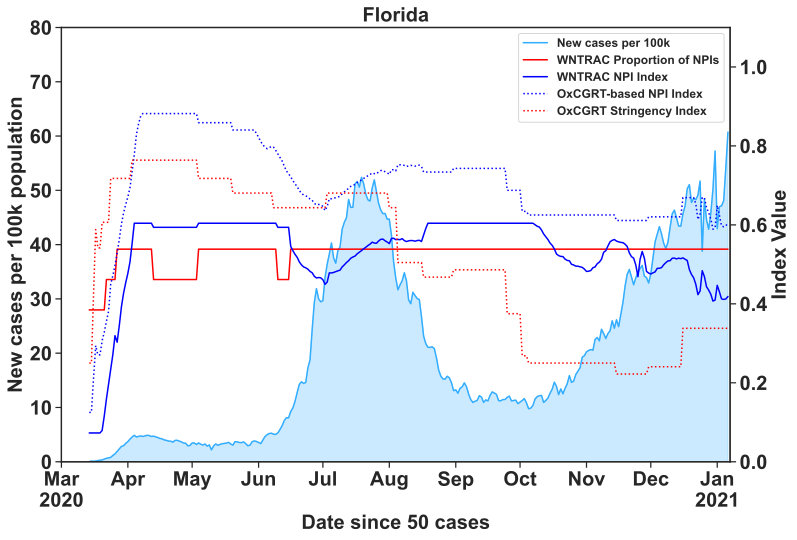

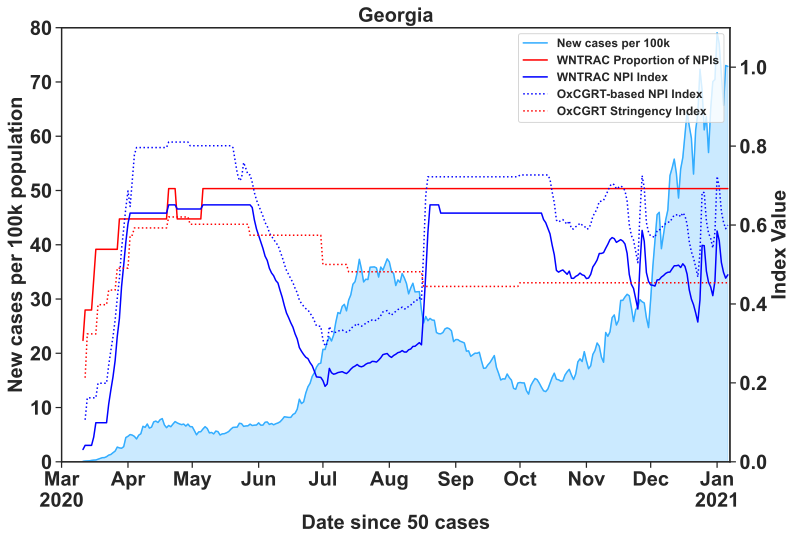

In [39]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
mpl.rcParams['font.size'] = 16.0
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.labelweight"] = "bold"

#Populations
pop_new_york = 19453561
pop_texas = 28995881
pop_florida = 21477737
pop_georgia = 10617423


selected_geographies ={'USA-NY':pop_new_york,'USA-TX':pop_texas,'USA-FL':pop_florida, 'USA-GA':pop_georgia}
selected_geographies_names ={'USA-NY':'New York','USA-TX': 'Texas','USA-FL':'Florida', 'USA-GA':'Georgia'}

npi_cols = ['confinement', 'domestic_flight_restriction','entertainment_or_cultural_sector_closure',
            'freedom_of_movement_nationality_dependent','international_flight_restrictions','introduction_of_travel_quarantine_policies', 
            'mask_wearing','mass_gatherings', 'public_services_closure', 
            'public_transportation','school_closure', 'state_of_emergency_legal_impact',
            'work_restrictions']

for geography in selected_geographies.keys():
    df = us_case_npi_df[us_case_npi_df['province_id']==geography].copy()
    df['npi_proportion'] = df[npi_cols].sum(axis = 1, skipna = True)/13
    df['new_cases_per_100k'] = (df['new_cases']*100000) / selected_geographies[geography]
    df['new_cases_per_100k_ewm7'] = df['new_cases_per_100k'].transform(lambda x: x.ewm(span=7).mean())
    df = df[df['days_since_fifty_cases']>=0]
    df = df[~(df['new_cases_per_100k_ewm7'].isna())]

    day0 = df['date_reported'].iloc[0].date()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    lns1 = ax1.plot(df['date_reported'], df['new_cases_per_100k_ewm7'], color ="#33adff",label='New cases per 100k')
    lns2 = ax2.plot(df['date_reported'], df['npi_proportion'], color="red", label='WNTRAC Proportion of NPIs' )
    lns3 = ax2.plot(df['date_reported'], df['wntrac_npi_index'], color="blue", label='WNTRAC NPI Index' )
    lns4 = ax2.plot(df['date_reported'], df['oxcgrt_npi_index'], color="blue", linestyle =':', label='OxCGRT-based NPI Index')
    lns5 = ax2.plot(df['date_reported'], df['oxcgrt_si'], color="red", linestyle =':', label='OxCGRT Stringency Index' )
   
    ax1.set_xlabel("Date since 50 cases", fontsize=20, fontweight='bold')
    ax1.set_ylabel("New cases per 100k population", fontsize=20, fontweight='bold')
    ax1.set_ylim([0,80])
    ax2.set_ylabel("Index Value", fontsize=20, fontweight='bold')
    
    ax2.set_ylim([0,1.1])
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax1.tick_params(axis='both', which='minor', labelsize=20)

    
    ax2.tick_params(axis='both', which='major', labelsize=20)
    ax2.tick_params(axis='both', which='minor', labelsize=20)
    ax1.tick_params(axis = "x", which = "both", bottom = True, top = False)
    
    date_form = mpl.dates.DateFormatter("%b %Y")
    ax1.xaxis.set_major_formatter(date_form)
    ax1.set_xlim([datetime.strptime('2020-03-1', '%Y-%m-%d'),datetime.strptime(date_string, '%Y-%m-%d')])

    
    #manual axis labels
    ax1_labels= ['Mar\n2020', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan\n2021']

    
    ax1.set_xticklabels(ax1_labels)
    
    lns = lns1 + lns2 + lns3 + lns4 + lns5
    labs = [l.get_label() for l in lns]
    
    d = np.zeros(df.shape[0])
    ax1.fill_between(x=df['date_reported'],y1=  df['new_cases_per_100k_ewm7'], interpolate=True, color="#33adff", alpha =.25)
 
    ax2.legend(lns, labs, fontsize=12, loc='upper right')
    plt.title(selected_geographies_names[geography], fontsize=20, fontweight='bold')
    if not os.path.exists('plots'):
        os.makedirs('plots')
    fig.savefig("plots/npi_index_"+geography.replace(" ", "_").lower()+".jpeg", dpi=300,bbox_inches='tight')
    
    plt.show()
    plt.close()